# CAPSTONE PROJECT:

## Prediction of Airline Passenger Satisfaction

### Domain: Customer Analytics

- **Project by GROUP 4**
- **Mentor: Mr. Animesh Tiwari**
- **Batch: PGPDSE-FT Online Feb’24**

### Table of Content

1. **[Problem Statement](#statement)**
2. **[Data Dictionary](#dataset)**
3. **[Import Libraries](#lib)**
4. **[Data Preparation](#prep)**
    - 4.1 - **[Understand the Data](#read)**
    - 4.2 - **[Remove Insignificant Variables](#drop)**
    - 4.3 - **[Missing Value Analysis](#null)**
    - 4.4 - **[Outlier Analysis](#outlier)**
    - 4.5 - **[Visualizations](#plots)** 
5. **[Hypothesis Testing](#stats)**
6. **[Feature Engineering](#feature)**
7. **[Feature Encoding](#encode)**
8. **[Feature Scaling](#scaling)**
9. **[Unsupervised Learning](#usl)**
    - 9.1 - **[Principal Component Analysis](#pca)**
    - 9.2 - **[K-means Clustering](#kmeans)**
10. **[Supervised Learning](#sl)**
    - 10.1 - **[Logistic Regression](#lr)**
    - 10.2 - **[Ridge Classifier](#rge)**
    - 10.3 - **[Decision Tree](#dt)**
    - 10.4 - **[K-Nearest Neighbors](#knn)**
    - 10.5 - **[Gaussian Naive Bayes'](#gb)**
    - 10.6 - **[Random Forest](#rf)**
    - 10.7 - **[AdaBoost Classifier](#ada)**
    - 10.8 - **[Extreme Gradient Boost](#xgb)**
11. **[Model Evaluation](#eval)**
    - 11.1 - **[Result Table](#res)**
    - 11.2 - **[K-Fold CrossValidation](#kcv)**
12. **[Model Optimization](#tune)**   
    - 12.1 - **[XGBoost Hyperparameter Tuning](#xgtune)**
    - 12.2 - **[Random Forest Hyperparameter Tuning](#rftune)**
13. **[Recommendations](#rec)**
14. **[Next Steps](#next)**

<a id="statement"></a>
## 1. Problem Statement

In a rapidly growing and competitive airline industry, understanding and predicting passenger satisfaction is crucial for maintaining customer loyalty and driving revenue growth. This project aims to leverage machine learning to predict passenger satisfaction and segment customers based on travel behaviors and service experiences. By identifying key factors that influence satisfaction, the airline can target customer needs through personalized marketing and improve service areas that impact customer experience the most. This initiative will support data-driven strategies to reduce complaints, enhance passenger retention, and boost engagement, contributing directly to business growth and customer loyalty.

<a id="dataset"></a>
## 2. Data dictionary

This dataset contains an **airline passenger satisfaction survey**. There are `25 features` and `103904 records`.

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

<a id="lib"></a>
## 3. Import Libraries

In [326]:
# Importing required libs
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# to show all columns
pd.set_option('display.max_columns',None)

# Format to 2 decimal places for display
pd.options.display.float_format = "{:.2f}".format

# to suppress the warnings
from warnings import filterwarnings
filterwarnings('ignore')

# for feature scaling
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

# to perform statistical tests
import scipy.stats as st

# for clustering and PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# to to convert RidgeClassifier outputs into probabilities
from sklearn.calibration import CalibratedClassifierCV

# Ensembled models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# for model tunning 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# for model evaluation
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score

<a id="prep"></a>
## 4. Data Preparation

<a id="read"></a>
### 4.1 Understand the Data

**Read the dataset and print the first five observations**

In [ ]:
### Loading the dataset
airline_df = pd.read_csv('train.csv' )
airline_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


In [4]:
# copying the original dataframe to df_copy_1 for further use.
df_copy_1 = airline_df.copy()

In [5]:
# checking columns 
df_copy_1.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

**Let us now see the number of variables and observations in the data**

In [6]:
# checking the rows and columns
df_copy_1.shape

(103904, 25)

**Interpretation:** The data has 103904 observations and 25 variables

**Standardizing column names for consistency** 

In [7]:
# Renaming the columns imputing ' ' with '_' 
df_copy_1.columns = ['Unnamed: 0', 'id', 'Gender', 'Customer_type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_delay_in_minutes', 'Arrival_delay_in_minutes',
       'satisfaction']

**Get a concise summary of the DataFrame**

In [8]:
# checking the datatypes of the columns
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_online_booking             103904 non-null  int64  
 11  Gate_location                      1039

**Interpretation:**   
Types of variables: int64, float64, object  
There are categorical features (Ratings) in nature but are represented as numerical.  

**Checking for a unique identifier and its duplicates in our data**

In [9]:
# ID column is the unique identifier in our dataset
df_copy_1['id'].nunique()

103904

In [10]:
# checking for duplicate records based on this column
df_copy_1.duplicated(['id']).sum()

0

**Interpretation:** There are no duplicate values in `id` column.  
Irrespective of the duplicates, this column can be ignored as this is a survey data and duplicate IDs are valid since one person could have travelled more than once and given more than one survey.

**Statistical summary of the numerical columns**

In [11]:
# summary of all the numerical variables
df_copy_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.00,51951.50,29994.65,0.00,25975.75,51951.50,77927.25,103903.00
id,103904.00,64924.21,37463.81,1.00,32533.75,64856.50,97368.25,129880.00
Age,103904.00,39.38,15.11,7.00,27.00,40.00,51.00,85.00
Flight_distance,103904.00,1189.45,997.15,31.00,414.00,843.00,1743.00,4983.00
Inflight_wifi_service,103904.00,2.73,1.33,0.00,2.00,3.00,4.00,5.00
Departure/Arrival_time_convenient,103904.00,3.06,1.53,0.00,2.00,3.00,4.00,5.00
Ease_of_online_booking,103904.00,2.76,1.40,0.00,2.00,3.00,4.00,5.00
Gate_location,103904.00,2.98,1.28,0.00,2.00,3.00,4.00,5.00
Food_and_drink,103904.00,3.20,1.33,0.00,2.00,3.00,4.00,5.00
Online_boarding,103904.00,3.25,1.35,0.00,2.00,3.00,4.00,5.00


<a id="drop"></a>
### 4.2 Removing Insignificant Variables

Let's remove the ` Unnamed: 0` column, which is index and `id` column as they are unuseful for the analysis.

In [12]:
df_copy_1 = df_copy_1.drop(columns = ['Unnamed: 0', 'id'], axis = 1)
df_copy_1.head()

,Gender,Customer_type,Age,Type_of_Travel,Class,Flight_distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


In [13]:
df_copy_1.columns

Index(['Gender', 'Customer_type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_delay_in_minutes', 'Arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

<a id="null"></a>
### 4.3 Missing Value Analysis

In [16]:
# Missing Values Analysis

total_missing = df_copy_1.isnull().sum().sort_values(ascending = False)
percent_missing = ((df_copy_1.isnull().sum()/df_copy_1.isnull().count())*100).sort_values(ascending = False)

missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total','Percent'])
missing_data

,Total,Percent
Arrival_delay_in_minutes,310,0.30
Gender,0,0.00
Seat_comfort,0,0.00
Departure_delay_in_minutes,0,0.00
Cleanliness,0,0.00
Inflight_service,0,0.00
Checkin_service,0,0.00
Baggage_handling,0,0.00
Leg_room_service,0,0.00
On-board_service,0,0.00


**Interpretation:** There are 310 null values in the column `Arrival_Delay_in_Minutes`

**Checking the Class imbalance for `satisfaction`**

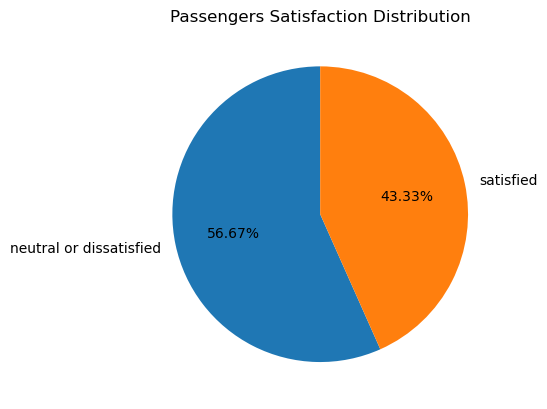

In [ ]:
# pie chart to check the class imbalance
plt.pie(df_copy_1['satisfaction'].value_counts(), labels=df_copy_1['satisfaction'].value_counts().index, autopct='%1.2f%%', startangle=90)
plt.title('Passengers Satisfaction Distribution')
plt.show()

**Interpretation:** 
`satisfaction` (target column) does not represent a significant class imbalance.
Hence, we need not to handle the imbalance for model building.

**Checking the values in the columns with the data type as object**

In [23]:
# Class-wise count for each categorical variable
arr_objdtype = df_copy_1.select_dtypes(include='object').columns
for col in arr_objdtype :
   print(df_copy_1[col].value_counts())
   print("\n*****************************")

Gender
Female    52727
Male      51177
Name: count, dtype: int64

*****************************
Customer_type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

*****************************
Type_of_Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

*****************************
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

*****************************
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

*****************************


**Interpretation:** the columns have categorical data.

**Unknowns or special characters:**    
There are no Unknowns or special characters.

#### Cardinality of categorical features

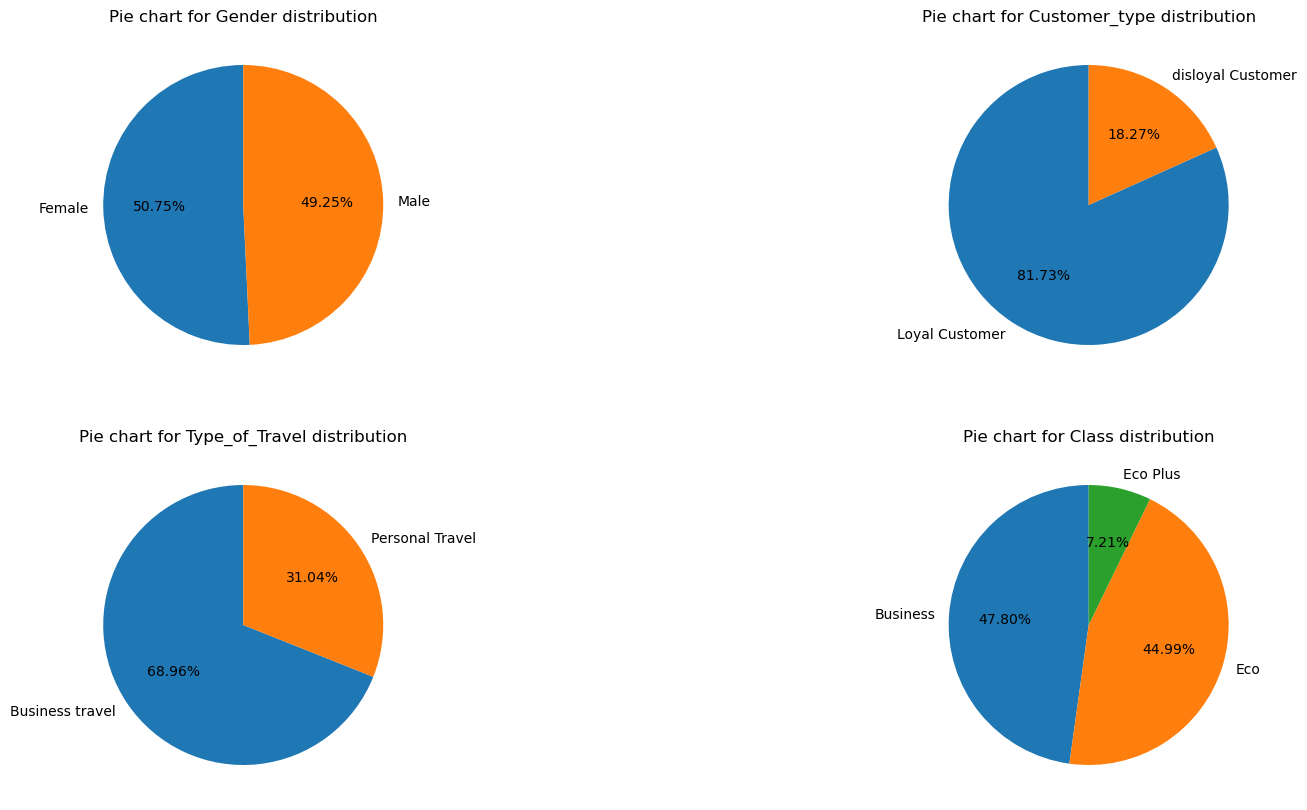

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,10))
cat_cols_vars = df_copy_1.iloc[:,[0,1,3,4]]
axes = ax.flatten()

# use for loop to plot the boxplot for each variable
for i, col in enumerate(cat_cols_vars.columns):
    if col in cat_cols_vars.columns:
        # Get value counts for the column,
        values = cat_cols_vars[col].value_counts()

        # Plot pie chart in the appropriate subplot
        axes[i].pie(values, labels= values.index, autopct='%1.2f%%', startangle=90)
        axes[i].set_title(f'Pie chart for {col} distribution')
# display the plot
plt.show()

**Interpretation:**`Class` column has the sense of order: Business > Economy Plus > Economy. 
This can be ordinally encoded.

**Checking the values of the columns that contain various ratings**

In [47]:
for col in df_copy_1.iloc[:,6:20].columns :
   print(df_copy_1[col].value_counts())
   print("\n*****************************")

Inflight_wifi_service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64

*****************************
Departure/Arrival_time_convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64

*****************************
Ease_of_online_booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: count, dtype: int64

*****************************
Gate_location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: count, dtype: int64

*****************************
Food_and_drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: count, dtype: int64

*****************************
Online_boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: count, dtype: int64

*****************************
Seat_comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: count, dtype: int64

*****************************
In

**Interpretation:** All the columns are ranging from 0 to 5 or 1 to 5

<a id="outlier"></a>
### 4.4 Outlier Analysis

In [50]:
# Function to detect number of outliers using IQR

def find_outliers(df, col):
    colname = []
    count = []
    Total_count = []

    for i , col in enumerate(col):
        Total_count.append(df[col].shape[0])

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1

        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        count_no = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

        colname.append(col)
        count.append(count_no)

    outlier_df = pd.DataFrame({"Feature_Name" : colname ,"Total Count" : Total_count,  "Outlier_count" : count})
    outlier_df['OutlierPercent'] = (outlier_df['Outlier_count'] / outlier_df['Total Count'])*100
    return outlier_df

# call the function and get outliers for each column
df_conti_var = df_copy_1.iloc[:,[2,5,20,21]]
find_outliers(df_conti_var, df_conti_var.columns)

,Feature_Name,Total Count,Outlier_count,OutlierPercent
0,Age,103904,0,0.00
1,Flight_distance,103904,2291,2.20
2,Departure_delay_in_minutes,103904,14529,13.98
3,Arrival_delay_in_minutes,103904,13954,13.43


Let's check the proportion of satisfaction to dissatisfactionin in `Arrival_Delay_in_Minutes`, `Departure_Delay_in_Minutes` where we have outliers

In [51]:
# checking outliers for 'Departure Delay in Minutes', 'Arrival Delay in Minutes'columns and storing their index in dictionary
out_prop_dict={}
out_prop = df_copy_1[['Departure_delay_in_minutes', 'Arrival_delay_in_minutes']]
for col in out_prop:
    q1 = df_copy_1[col].quantile(0.25)
    q3 = df_copy_1[col].quantile(0.75)
    iqr = q3-q1
    out_prop_dict[col] = df_copy_1[((df_copy_1[col] < (q1 - 1.5 * iqr)) | (df_copy_1[col] > (q3 + 1.5 * iqr)))].index

# checking proportion of 'Arrival Delay in Minutes'
print("Arrival Delay in Minutes:")
display(df_copy_1['satisfaction'].iloc[out_prop_dict['Arrival_delay_in_minutes'].values].value_counts(normalize=True))

# checking proportion of 'Departure Delay in Minutes'
print("\nDeparture Delay in Minutes:")
display(df_copy_1['satisfaction'].iloc[out_prop_dict['Departure_delay_in_minutes'].values].value_counts(normalize=True))

Arrival Delay in Minutes:


satisfaction
neutral or dissatisfied   0.64
satisfied                 0.36
Name: proportion, dtype: float64


Departure Delay in Minutes:


satisfaction
neutral or dissatisfied   0.64
satisfied                 0.36
Name: proportion, dtype: float64

**Interpretation:** Both arrival and departure delays have the same satisfaction distribution (64% dissatisfied, 36% satisfied). This consistency suggests that any delay negatively impacts satisfaction, whether at the start or end of the journey.

**Influence of outliers on numerical features:**

In [52]:
df_conti_var.describe()

,Age,Flight_distance,Departure_delay_in_minutes,Arrival_delay_in_minutes
count,103904.00,103904.00,103904.00,103594.00
mean,39.38,1189.45,14.82,15.18
std,15.11,997.15,38.23,38.70
min,7.00,31.00,0.00,0.00
25%,27.00,414.00,0.00,0.00
50%,40.00,843.00,0.00,0.00
75%,51.00,1743.00,12.00,13.00
max,85.00,4983.00,1592.00,1584.00


Case 1: Outliers are not influential: Overlapping mean and median imply that outliers are not influential. If the data has no or very few outliers, the mean and median will be relatively close to each other. In this case, we can use a `Min Max Scaler`.

Case 2: Outliers are influential: Different mean and median imply that outliers are influential. Outliers distort the mean, but not necessarily the median, since the median is more robust to outliers. In this case, we can use a `Robust Scaler`.

**Interpretation**: Since our outliers are influential, `Robust Scaler` will be used for scaling numerical features.

<a id="plots"></a>
### 4.5 Visualizations

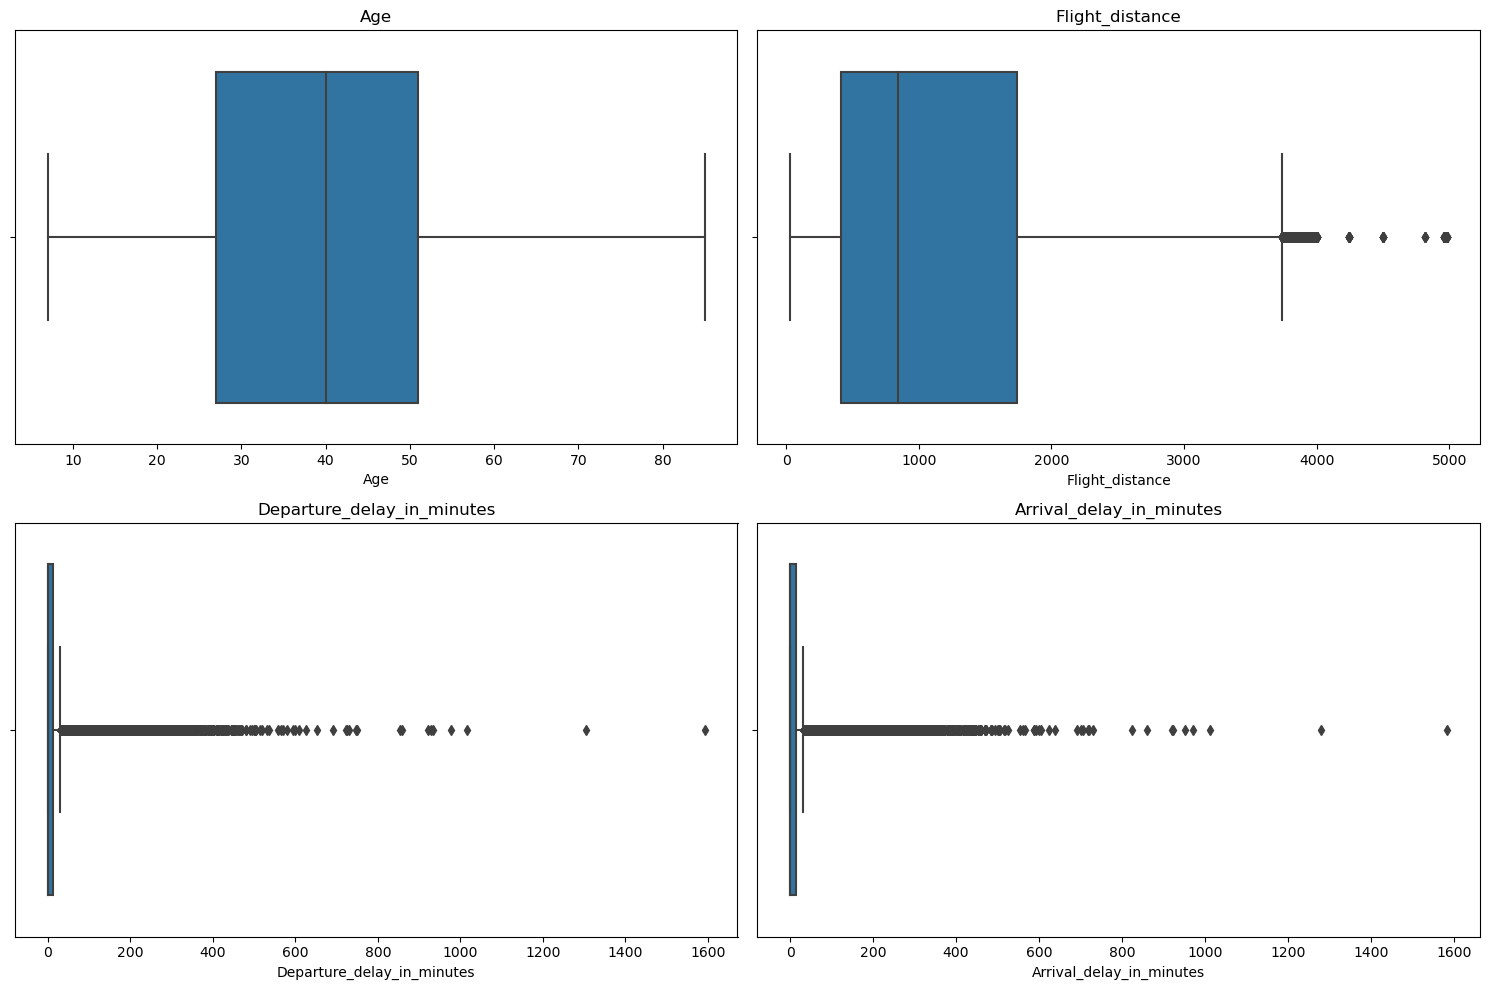

In [55]:
# Let's visualize outliers using Box-whisker plots

count = 1
plt.figure(figsize = (15,10))
for i in df_conti_var:
    plt.subplot(2,2,count)
    sns.boxplot(x = i, data = df_conti_var)
    plt.title(i)
    plt.tight_layout()
    count += 1

**Interpretation**:
* Two sided outliers have to be treated.
* One sided outliers do not necessarily require treatment, as they may represent valid extreme values in the data.

In [85]:
cat_cols_vars.columns

Index(['Gender', 'Customer_type', 'Type_of_Travel', 'Class'], dtype='object')

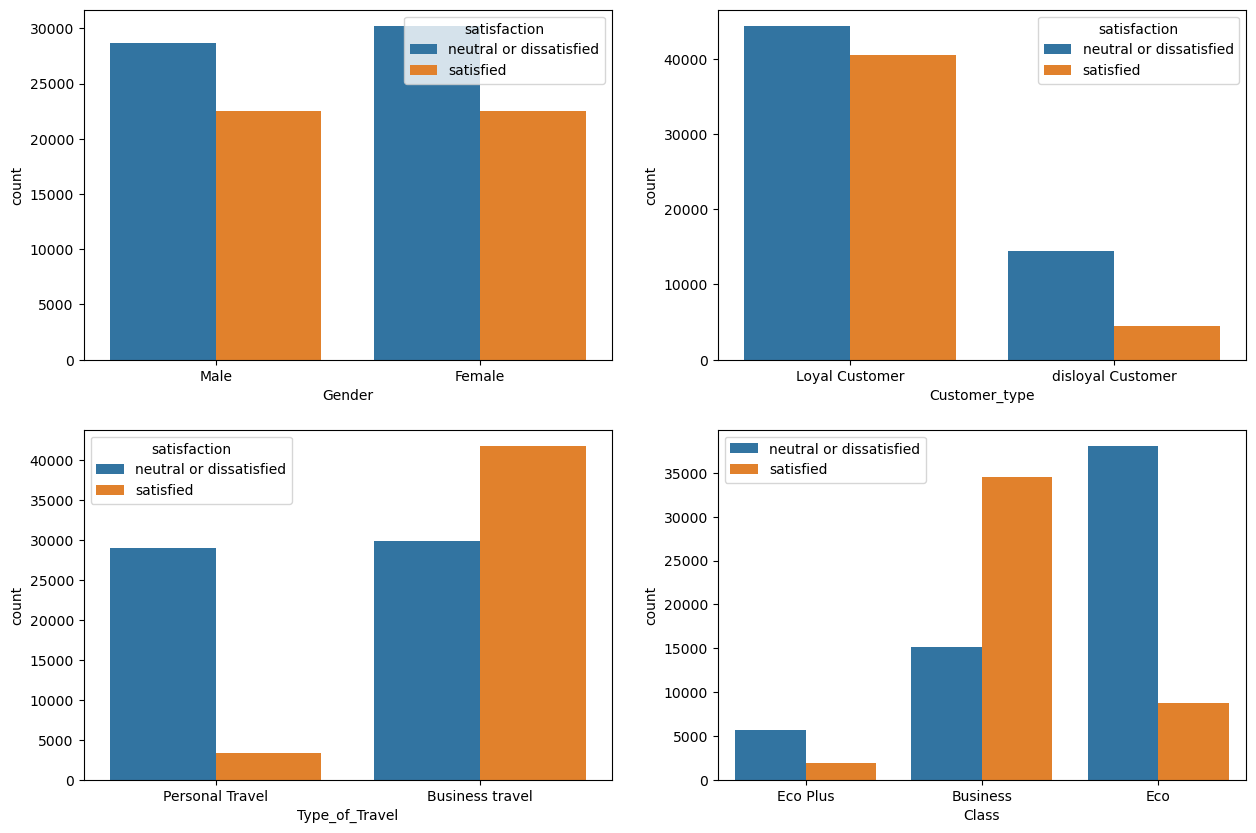

In [127]:
# Categorical columns with target variable
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
for col,subplt in zip(cat_cols_vars.columns,ax.flatten()):
    sns.countplot(x = col, hue= 'satisfaction', data= df_copy_1,ax=subplt)
plt.legend(loc = 'best')
plt.show()

From the visualizations, here are some **observations**:

* Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same
  factors

* No. of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the
  loyalty.
  Airline will have to work on maintaining the loyal customers

* Business Travellers seems to be more satisfied with the flight, than the personal travellers

* People in business class seems to be the most satisfied, and those travelling in economy class are least satisfied

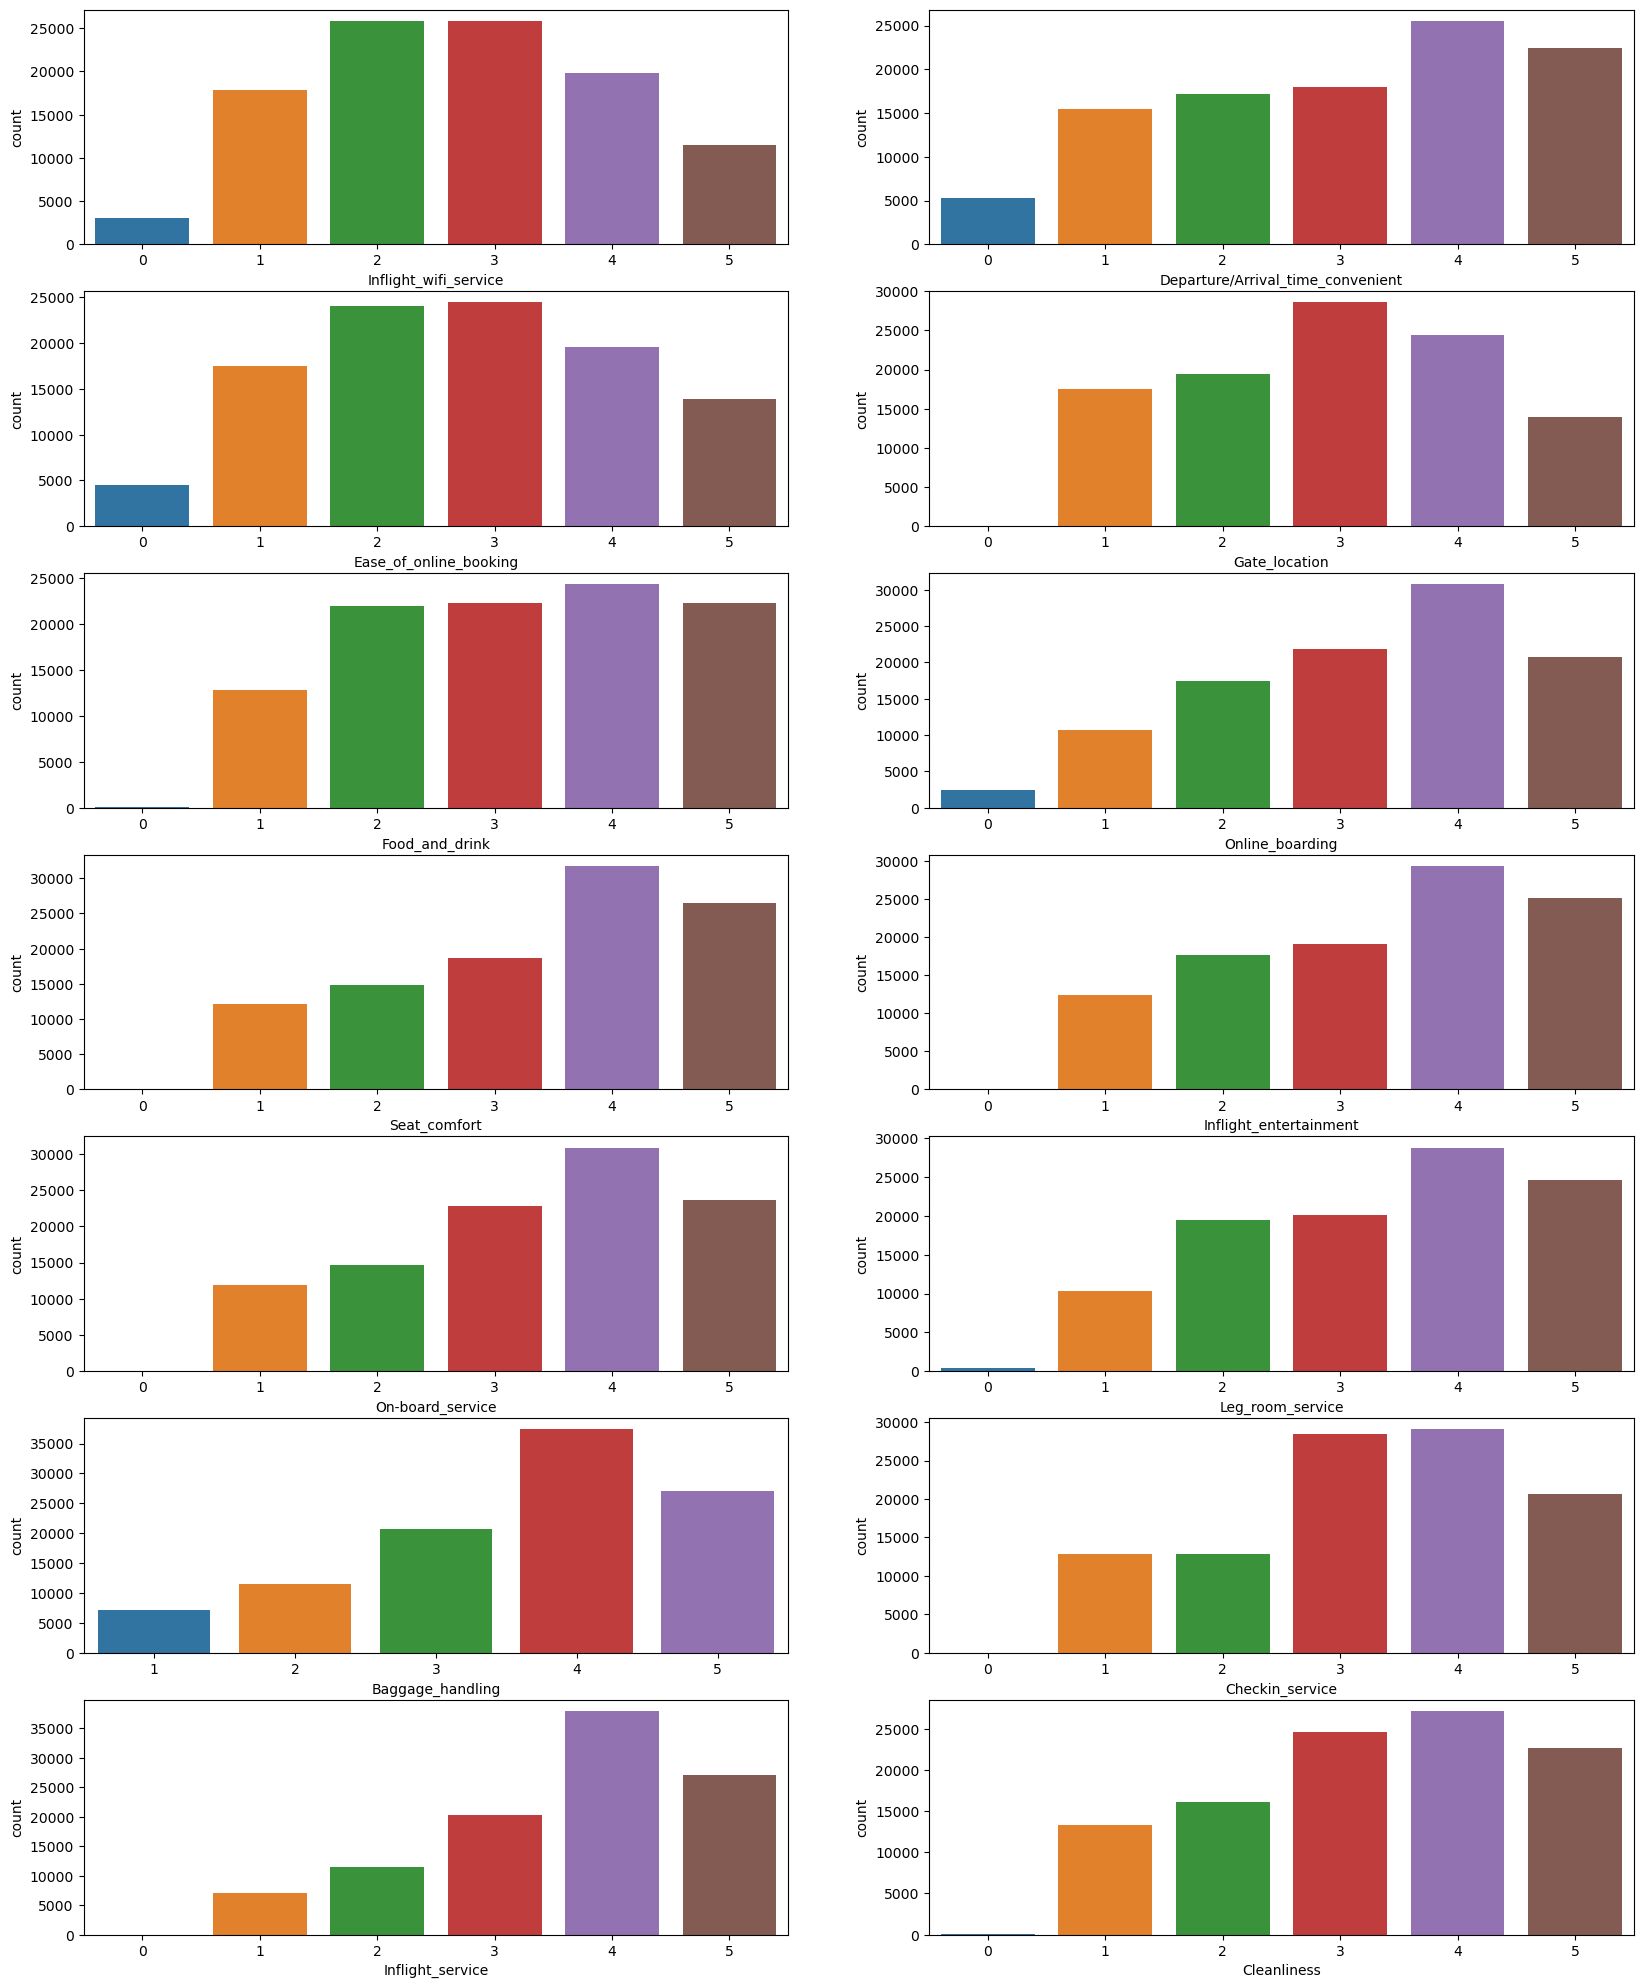

In [ ]:
# can be removed
# Visualize all the ratings columns
fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize=(20, 25))
ratings_df = df_copy_1.iloc[:,6:20]

# use for loop to plot the countplot for each variable
for variable, subplot in zip(ratings_df.columns, ax.flatten()):
    sns.countplot(x = ratings_df[variable], ax = subplot)

# display the plot
plt.show()

#### Coefficient of Variation (CV)

Coefficient of Variation is the ratio of the standard deviation to the mean. It is a unitless measure, useful for comparing the relative variability between different features with different scales.

In [90]:
# Higher CV indicates more variability relative to the mean.

for col in df_conti_var:
    # Calculate Coefficient of Variation
    cv = df_copy_1[col].std() / df_copy_1[col].mean()
    print(f"Coefficient of variation for {col}: {cv}")

Coefficient of variation for Age: 0.38382621742104245
Coefficient of variation for Flight_distance: 0.8383274979664073
Coefficient of variation for Departure_delay_in_minutes: 2.5804458447484393
Coefficient of variation for Arrival_delay_in_minutes: 2.5495422757778554


#### Interpretation:

CV for any feature is much higher than the other, it indicates a larger magnitude difference between numerical variables. Hence, we need **feature scaling**.

#### Checking Correlation

<Figure size 2000x2500 with 0 Axes>

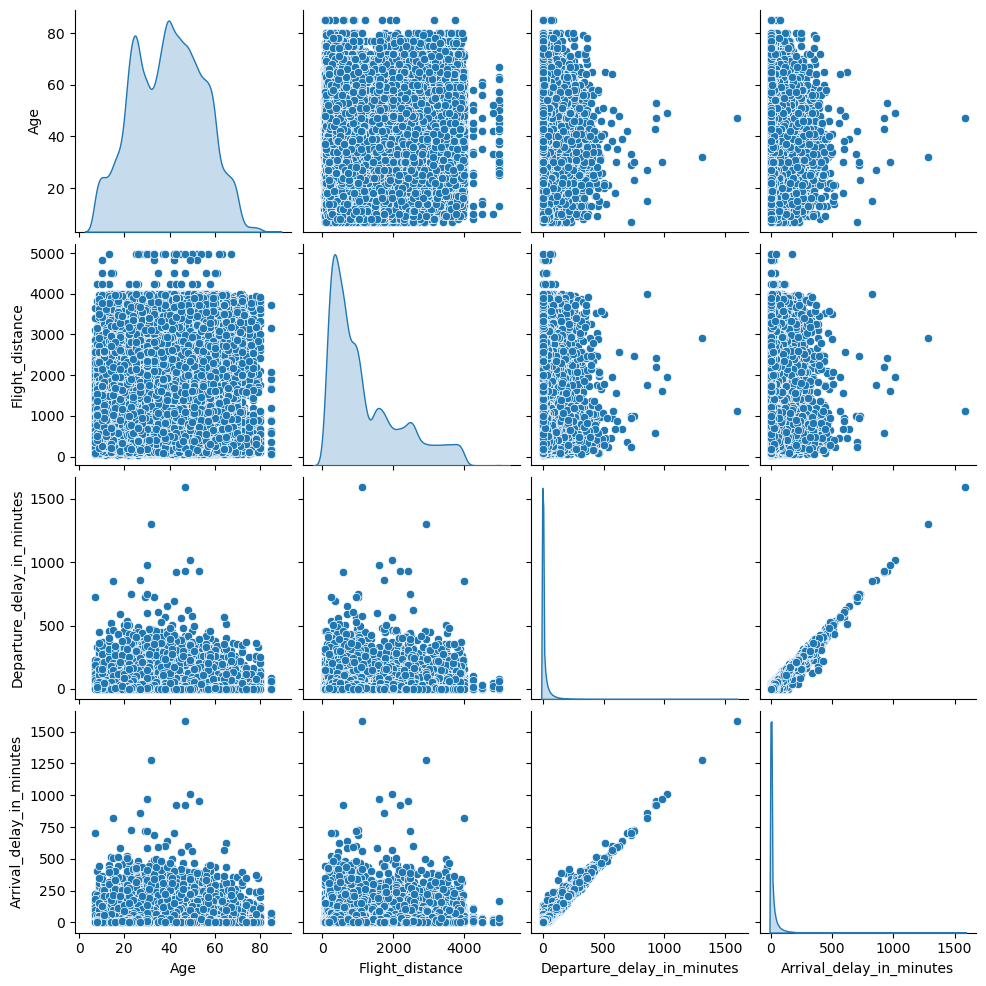

In [132]:
plt.figure(figsize=(20, 25))
sns.pairplot(df_conti_var, diag_kind = 'kde')
plt.show()

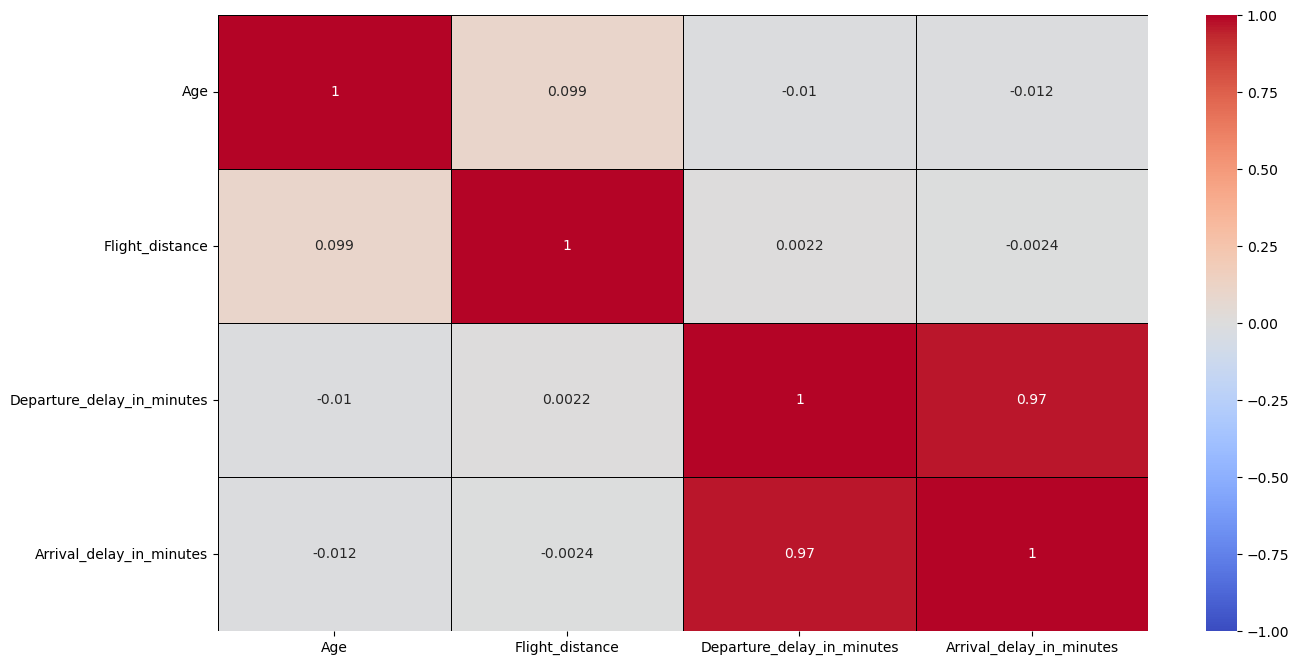

In [118]:
# Visualization of correlation between numerical variables
plt.figure(figsize = (15,8))
sns.heatmap(df_conti_var.corr(),linewidths = 0.6, annot = True, linecolor = "black",vmin=-1,cmap = 'coolwarm')
plt.show()

**Interpretation**: It shows a strong positive correlation between `Departure_Delay_in_Minutes` and `Arrival_Delay_in_Minutes`. Hence, either of the features can be dropped. Since, `Arrival_Delay_in_Minutes` has null valus as well, it is a better choice among the two.

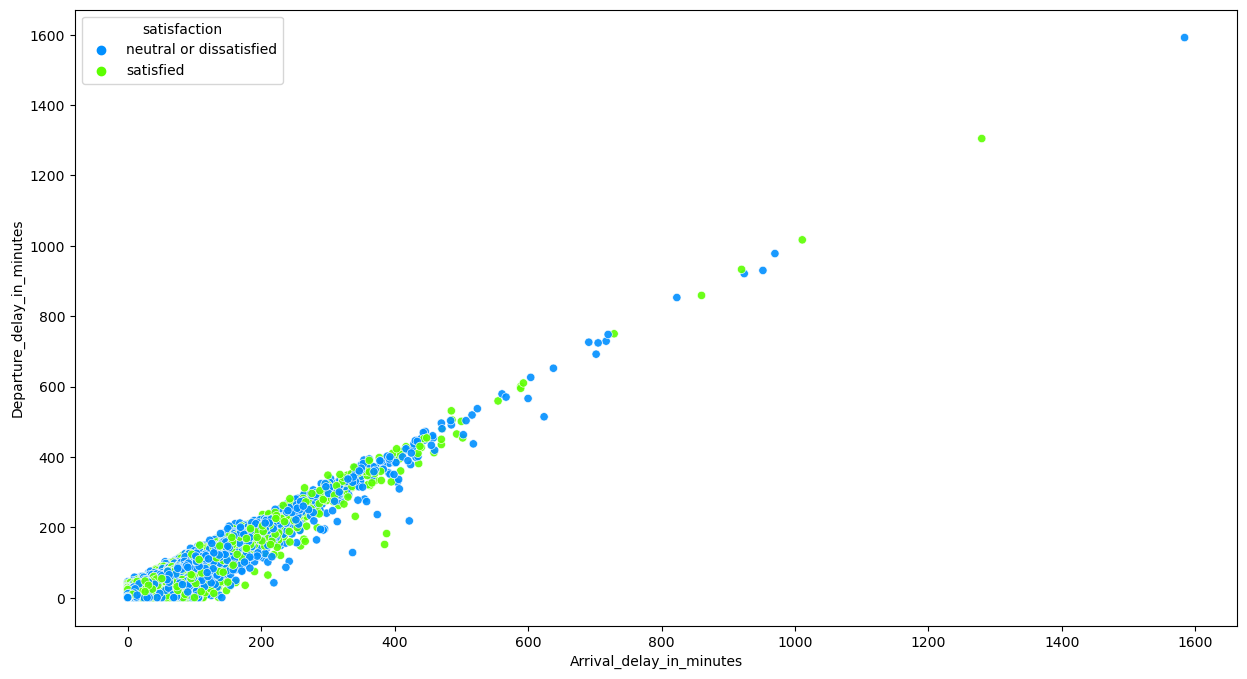

In [131]:
plt.figure(figsize=(15,8))
sns.scatterplot(data= df_copy_1,x='Arrival_delay_in_minutes',y='Departure_delay_in_minutes',hue='satisfaction',
                palette='gist_rainbow_r', alpha=0.9)
plt.show()

**Interpretation** :
The arrival and departure delay seems to have a linear relationship, which makes complete sense because of the high correlation between them.

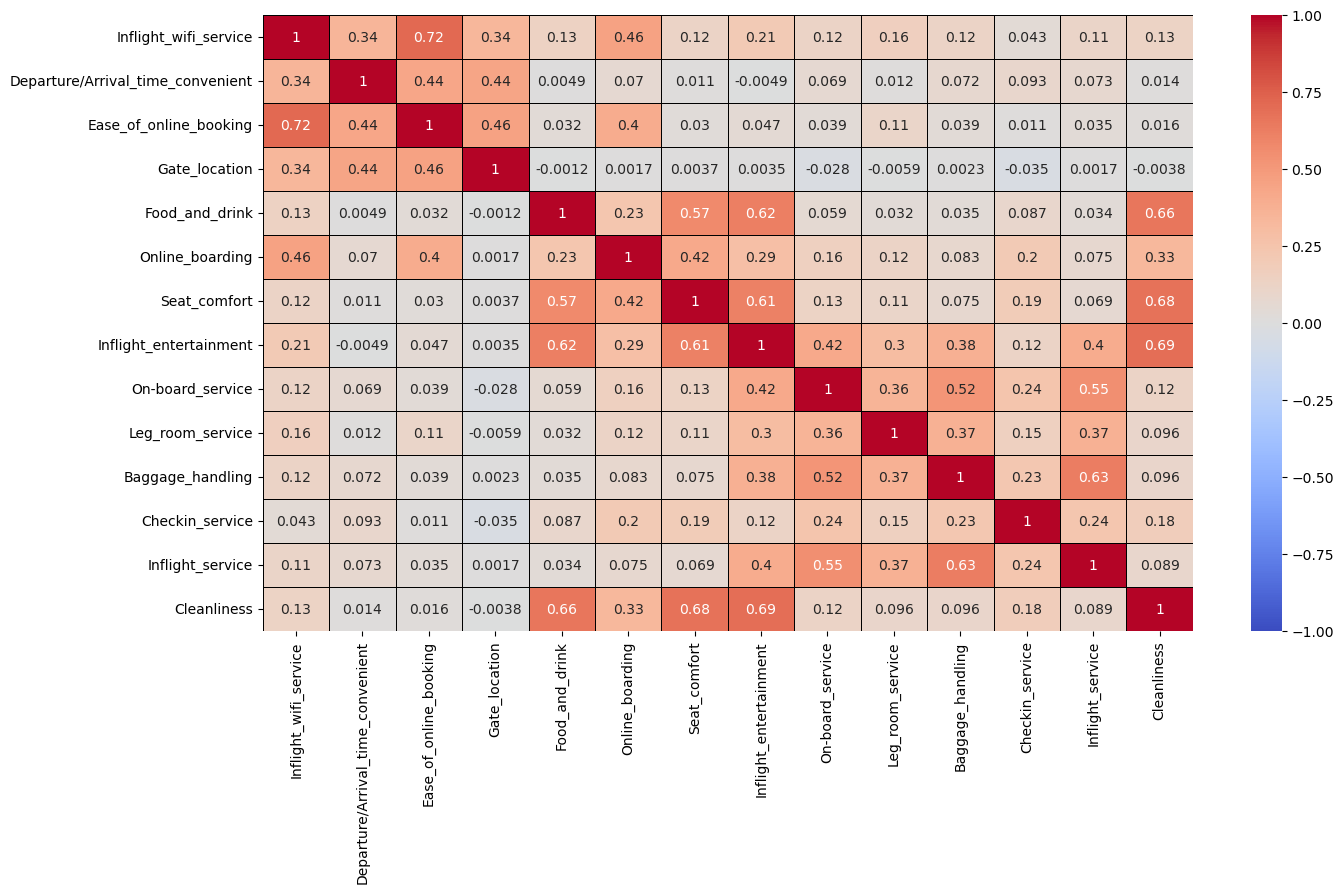

In [124]:
# ratings columns correlation
plt.figure(figsize = (15,8))
sns.heatmap(ratings_df.corr(), linewidths = 0.6, annot = True, linecolor = "black",vmin=-1,cmap = 'coolwarm')
plt.show()

**Interpretation**: Correlation between various ratings are not very strong. All values are less than 0.73.

**Visualize the relation between ratings columns vs Target column**

In [137]:
# function for boxplot visualizations.
def ratings_target_boxplot(rating_cols):
    fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize=(20, 25))
    for variable, subplot in zip(rating_cols.columns, ax.flatten()):
        sns.boxplot(x = df_copy_1['satisfaction'], y = df_copy_1[variable], data = df_copy_1, ax = subplot)
    plt.show()

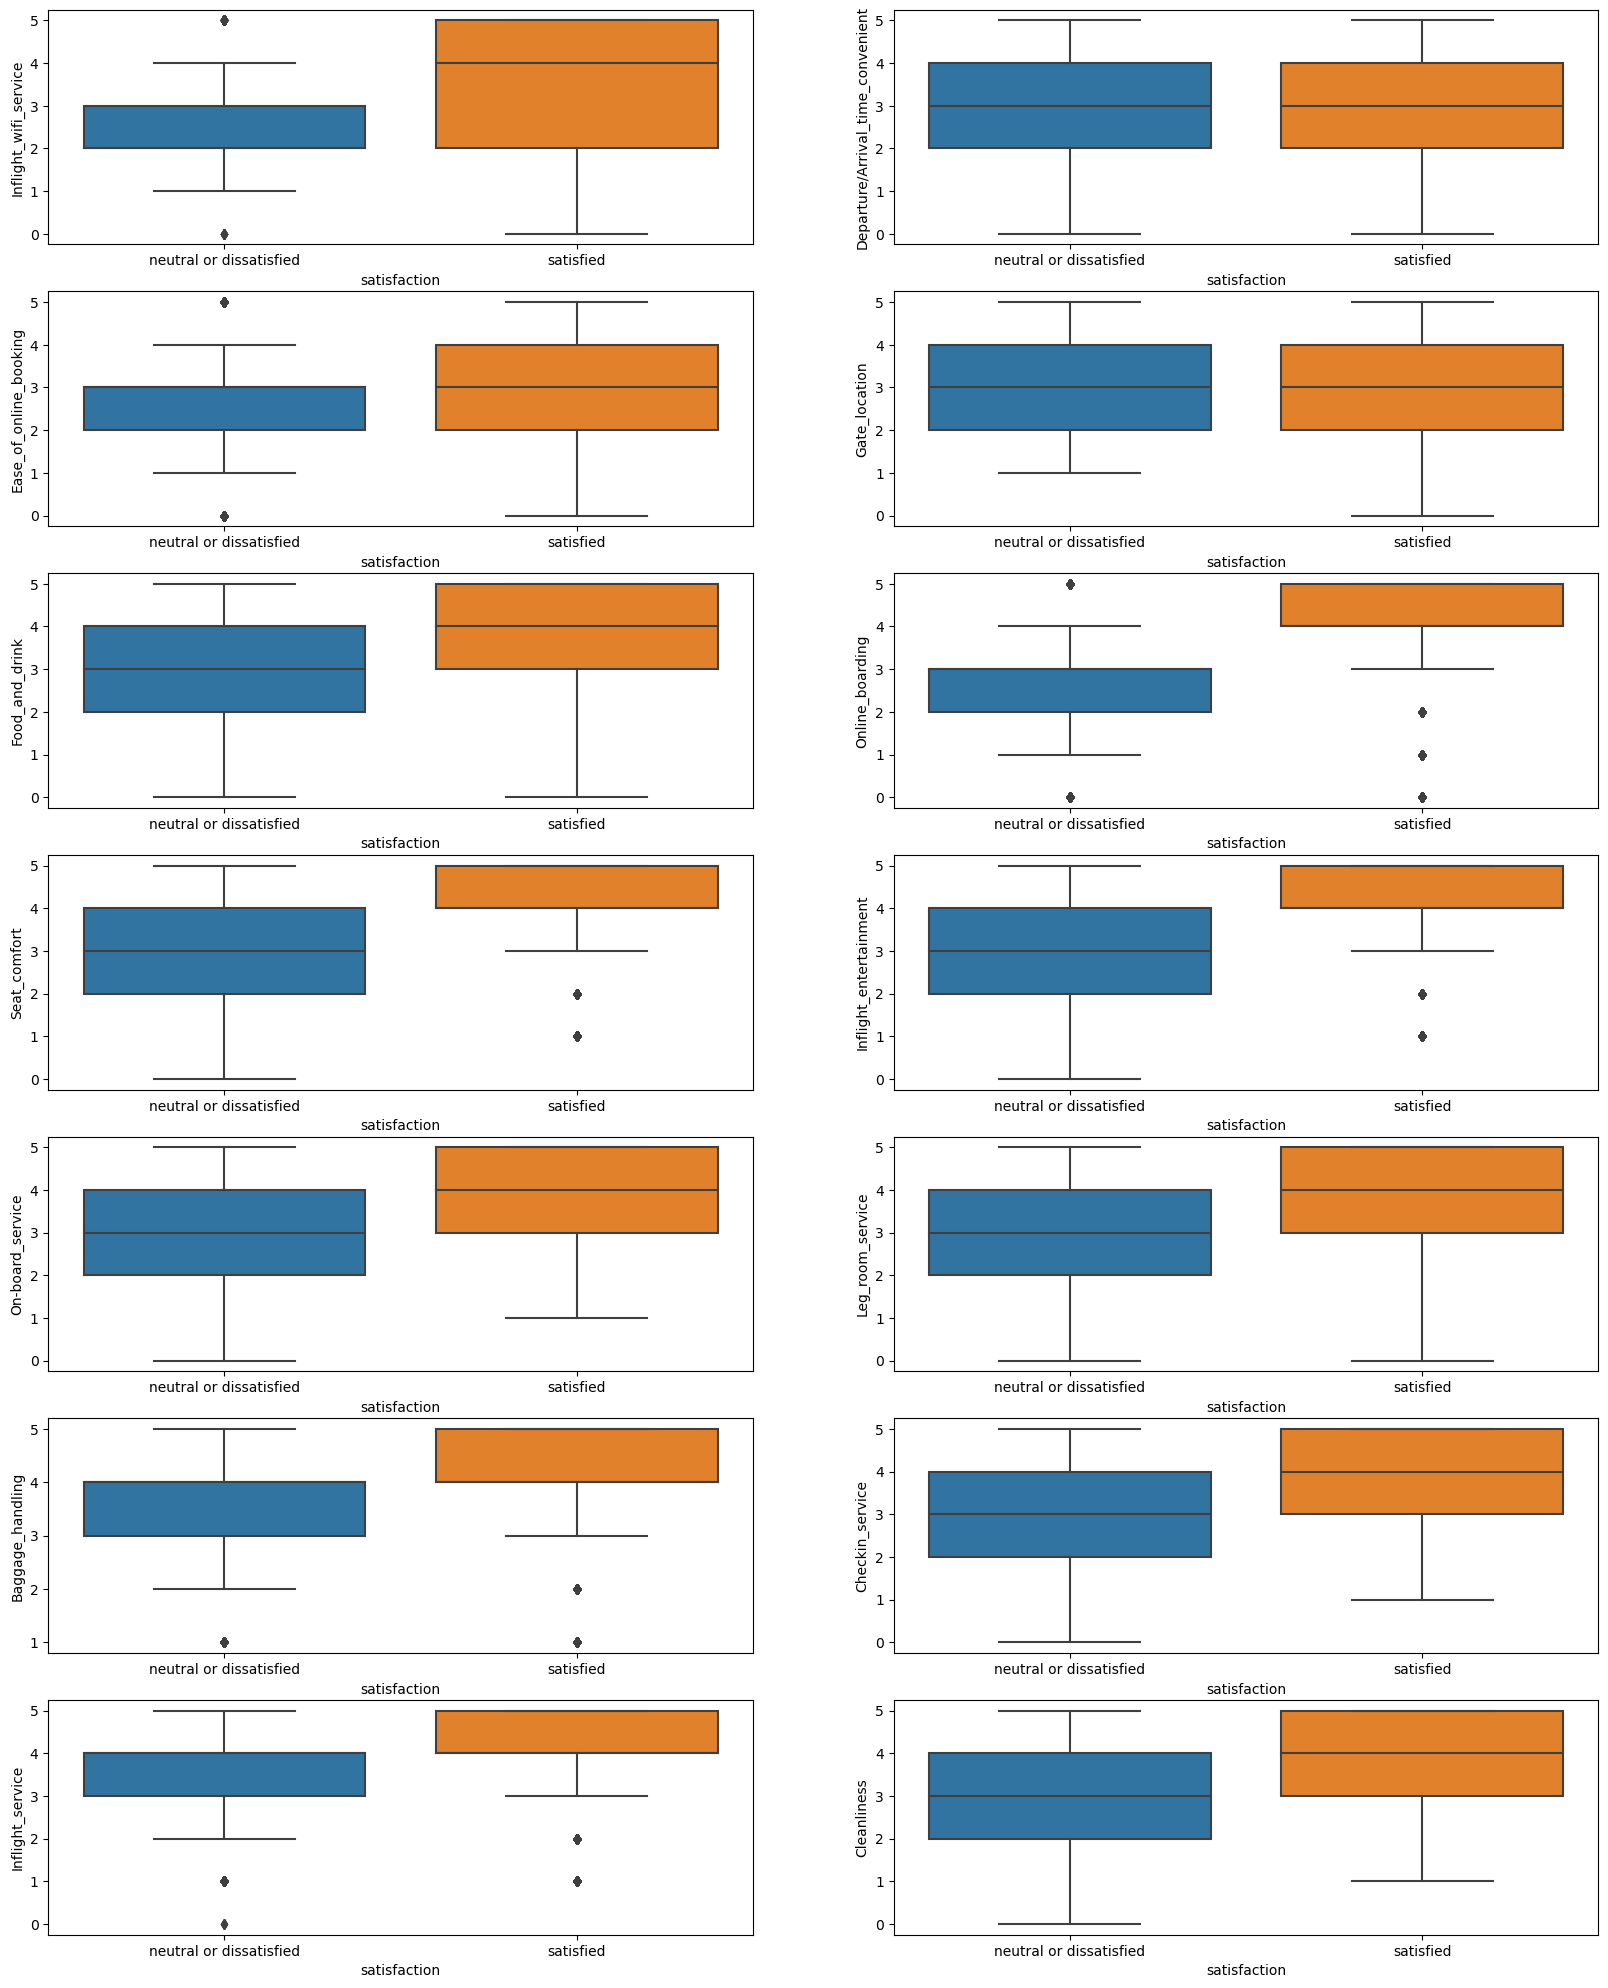

In [138]:
# call the function
ratings_target_boxplot(ratings_df)

**Interpretation:** we can see that there is a difference between satisfaction levels among various ratings. Hence, conducting statistical tests could help determine if the difference between satisfaction levels among ratings as well as other columns are statistically significant or not.

<a id="stats"></a>
## 5. Hypothesis Testing

* Categorical Vs Categorical(Target) : `Chi-Squared Test/Cramer's V` --- 4 tests
* Numerical (Ratings) Vs Categorical (Target) : `Chi-Square test/Cramer's V` --- 14 tests
* Numerical columns : `Shapiro-Wilk Test for normality` --- 4 tests
* Numerical columns : `Levene's Test` --- 1 tests
* No normality : `Mann-Whitney U Test` --- 3 tests
* With normality : `Independent Samples T-Test` --- 1 test

**Cramer’s V** ranges from 0 to 1, with values closer to 1 indicating a stronger association.

General interpretation thresholds:

* ~ 0.1 = Weak
* ~ 0.3 = Moderate
* ~ 0.5 = Strong

**`Chi-square test/Cramer's V test` for Categorical Vs Categorical (Target)** --- 4 tests

In [143]:
# Creating a function for Chi-square test of independence and Cramer's V

association_test_table = pd.DataFrame(columns = ['Target','Column','P-value','Test-outcome',
                                                 'Cramer\'s V','Strength of association'])
locat = 0
def chi_test(target, col):
    global locat
    if col.name in association_test_table['Column'].values:
        return association_test_table.reset_index(drop = True)
    else:
        contingency_table = pd.crosstab(target, col, margins = True, normalize = True)
        chi, p_value, dof, expected = st.chi2_contingency(pd.crosstab(target, col))

        if p_value < 0.05:
            result = "Reject the null hypothesis (H0)"
        else:
            result = "Fail to reject the null hypothesis(H0)"

        # Calculate Cramer's V
        n = pd.crosstab(target,col).sum().sum()
        min_dim = min(pd.crosstab(target,col).shape) - 1
        cramers_v = np.sqrt(chi/(n*min_dim))

        if cramers_v < 0.2:
            strength_status = "Weak association"
        elif cramers_v > 0.2 and cramers_v < 0.5:
            strength_status = "Moderate association"
        else:
            strength_status = "Strong association"

        association_test_table.loc[locat] = [target.name, col.name, p_value, result, round(cramers_v,2),strength_status]
        locat += 1
        return association_test_table.reset_index(drop = True)

#### Hypothesis statement

* Null Hypothesis (H0): There is no association between gender and satisfaction.
* Alternate Hypothesis (H1): There is some association between gender and satisfaction.

In [144]:
# call the function

chi_test(df_copy_1.satisfaction, df_copy_1.Gender)

,Target,Column,P-value,Test-outcome,Cramer's V,Strength of association
0,satisfaction,Gender,0.00,Reject the null hypothesis (H0),0.01,Weak association


#### Hypothesis statement

* Null Hypothesis (H0): There is no relationship between Customer type and satisfaction.
* Alternate Hypothesis (H1): There is some relationship between Customer type and satisfaction.

In [146]:
# call the function

chi_test(df_copy_1.satisfaction, df_copy_1.Customer_type)

,Target,Column,P-value,Test-outcome,Cramer's V,Strength of association
0,satisfaction,Gender,0.00,Reject the null hypothesis (H0),0.01,Weak association
1,satisfaction,Customer_type,0.00,Reject the null hypothesis (H0),0.19,Weak association


#### Hypothesis statement

* Null Hypothesis (H0): There is no relationship between travel type and satisfaction.
* Alternate Hypothesis (H1): There is some relationship between travel type and satisfaction.

In [147]:
# call the function

chi_test(df_copy_1.satisfaction, df_copy_1.Type_of_Travel)

,Target,Column,P-value,Test-outcome,Cramer's V,Strength of association
0,satisfaction,Gender,0.00,Reject the null hypothesis (H0),0.01,Weak association
1,satisfaction,Customer_type,0.00,Reject the null hypothesis (H0),0.19,Weak association
2,satisfaction,Type_of_Travel,0.00,Reject the null hypothesis (H0),0.45,Moderate association


#### Hypothesis statement

* Null Hypothesis (H0): There is no relationship between travel class and satisfaction.
* Alternate Hypothesis (H1): There is some relationship between travel class and satisfaction.

In [148]:
# call the function

chi_test(df_copy_1.satisfaction, df_copy_1.Class)

,Target,Column,P-value,Test-outcome,Cramer's V,Strength of association
0,satisfaction,Gender,0.00,Reject the null hypothesis (H0),0.01,Weak association
1,satisfaction,Customer_type,0.00,Reject the null hypothesis (H0),0.19,Weak association
2,satisfaction,Type_of_Travel,0.00,Reject the null hypothesis (H0),0.45,Moderate association
3,satisfaction,Class,0.00,Reject the null hypothesis (H0),0.50,Strong association


**`Chi-square test/Cramer's V test` for Numerical (Ratings) Vs Categorical (Target)** --- 14 tests

Rating columns have values ranging from 0 - 5 or 1 - 5. Hence, considering the ratings as categories for association test.

In [149]:
# creating a similar but separate function for this stats test

association_test_table2 = pd.DataFrame(columns = ['Target','Column','P-value','Test-outcome',
                                                 'Cramer\'s V','Strength of association'])
locate = 0
def chi_test_2(target, col):
    global locate
    if col.name in association_test_table2['Column'].values:
        return association_test_table2.reset_index(drop = True)
    else:
        contingency_table = pd.crosstab(target, col, margins = True, normalize = True)
        chi, p_value, dof, expected = st.chi2_contingency(pd.crosstab(target, col))

        if p_value < 0.05:
            result = "Reject the null hypothesis (H0)"
        else:
            result = "Fail to reject the null hypothesis(H0)"

        # Calculate Cramer's V
        n = pd.crosstab(target,col).sum().sum()
        min_dim = min(pd.crosstab(target,col).shape) - 1
        cramers_v = np.sqrt(chi/(n*min_dim))

        if cramers_v < 0.2:
            strength_status = "Weak association"
        elif cramers_v > 0.2 and cramers_v < 0.5:
            strength_status = "Moderate association"
        else:
            strength_status = "Strong association"

        association_test_table2.loc[locate] = [target.name, col.name, p_value, result, round(cramers_v,2), strength_status]
        locate += 1
        return association_test_table2.reset_index(drop = True)

In [150]:
# using for loop to iterate over ratings columns dataframe

for i in ratings_df.columns:
    chi_test_2(df_copy_1['satisfaction'], ratings_df[i])

association_test_table2

,Target,Column,P-value,Test-outcome,Cramer's V,Strength of association
0,satisfaction,Inflight_wifi_service,0.00,Reject the null hypothesis (H0),0.53,Strong association
1,satisfaction,Departure/Arrival_time_convenient,0.00,Reject the null hypothesis (H0),0.07,Weak association
2,satisfaction,Ease_of_online_booking,0.00,Reject the null hypothesis (H0),0.32,Moderate association
3,satisfaction,Gate_location,0.00,Reject the null hypothesis (H0),0.15,Weak association
4,satisfaction,Food_and_drink,0.00,Reject the null hypothesis (H0),0.22,Moderate association
5,satisfaction,Online_boarding,0.00,Reject the null hypothesis (H0),0.62,Strong association
6,satisfaction,Seat_comfort,0.00,Reject the null hypothesis (H0),0.39,Moderate association
7,satisfaction,Inflight_entertainment,0.00,Reject the null hypothesis (H0),0.42,Moderate association
8,satisfaction,On-board_service,0.00,Reject the null hypothesis (H0),0.33,Moderate association
9,satisfaction,Leg_room_service,0.00,Reject the null hypothesis (H0),0.34,Moderate association


**`Shapiro Wilk Test` for Normality of continuous variables**

In [160]:
normality_test_table = pd.DataFrame(columns = ['Column','P-value','Test-outcome','Inferences'])

locato = 0
def normality_test(col):
    global locato
    if col.name in normality_test_table['Column'].values:
        return normality_test_table.reset_index(drop = True)
    else:
        test_stat, p_value = st.shapiro(col)

        if p_value < 0.05:
            outcome = "Reject the null hypothesis (H0)"
            result = ' Data is not normally distributed '

        else:
            outcome = "Fail to reject the null hypothesis(H0)"
            result = 'Data is normally distributed '

        normality_test_table.loc[locato] = [col.name, p_value,outcome,result]
        locato += 1
        return normality_test_table.reset_index(drop = True)

#### Hypothesis statement

* Null Hypothesis (H0): Age is normally distributed.
* Alternate Hypothesis (H1): Age is not normally distributed.

In [161]:
normality_test(df_copy_1['Age'])

,Column,P-value,Test-outcome,Inferences
0,Age,0.00,Reject the null hypothesis (H0),Data is not normally distributed


#### Hypothesis statement

* Null Hypothesis (H0): Flight Distance is normally distributed.
* Alternate Hypothesis (H1): Flight Distance is not normally distributed.

In [162]:
normality_test(df_copy_1['Flight_distance'])

,Column,P-value,Test-outcome,Inferences
0,Age,0.00,Reject the null hypothesis (H0),Data is not normally distributed
1,Flight_distance,0.00,Reject the null hypothesis (H0),Data is not normally distributed


#### Hypothesis statement

* Null Hypothesis (H0): Departure Delay in minutes is normally distributed.
* Alternate Hypothesis (H1): Departure Delay in minutes is not normally distributed.

In [163]:
normality_test(df_copy_1['Departure_delay_in_minutes'])

,Column,P-value,Test-outcome,Inferences
0,Age,0.00,Reject the null hypothesis (H0),Data is not normally distributed
1,Flight_distance,0.00,Reject the null hypothesis (H0),Data is not normally distributed
2,Departure_delay_in_minutes,0.00,Reject the null hypothesis (H0),Data is not normally distributed


#### Hypothesis statement

* Null Hypothesis (H0): Arrival Delay in minutes is normally distributed.
* Alternate Hypothesis (H1): Arrival Delay in minutes is not normally distributed.

In [164]:
normality_test(df_copy_1['Arrival_delay_in_minutes'])

,Column,P-value,Test-outcome,Inferences
0,Age,0.00,Reject the null hypothesis (H0),Data is not normally distributed
1,Flight_distance,0.00,Reject the null hypothesis (H0),Data is not normally distributed
2,Departure_delay_in_minutes,0.00,Reject the null hypothesis (H0),Data is not normally distributed
3,Arrival_delay_in_minutes,1.00,Fail to reject the null hypothesis(H0),Data is normally distributed


**`Levene's Test` for Equality of variances of continuous variables**

`Levene's Test` will be only done for `Arrival_delay_in_minutes` according to the `normality_test_table`.

In [165]:
levene_test_table = pd.DataFrame(columns = ['Column','P-value','Test-outcome','Result'])

locati = 0
def levene_test(df,target,col):
    two_cat = target.unique().tolist()
    group1 = df[target == two_cat[0]][col.name]
    group2 = df[target == two_cat[1]][col.name]

    global locati
    if col.name in levene_test_table['Column'].values:
        return levene_test_table.reset_index(drop = True)
    else:
        test_stat, p_value = st.levene(group1, group2)

        if p_value < 0.05:
            outcome = "Reject the null hypothesis (H0)"
            result = "Variances are not equal"
        else:
            outcome = "Fail to reject the null hypothesis(H0)"
            result = "Variances are equal"

        levene_test_table.loc[locati] = [col.name, p_value, outcome, result]
        locati += 1
        return levene_test_table.reset_index(drop = True)

#### Hypothesis statement

* Null Hypothesis (H0): The variances of the Arrival delay variable are equal between the two categories.
* Alternate Hypothesis (H1): The variances of the Arrival delay variable are not equal between the two categories.

In [167]:
levene_test(df_copy_1, df_copy_1['satisfaction'], df_copy_1['Arrival_delay_in_minutes'])

,Column,P-value,Test-outcome,Result
0,Arrival_delay_in_minutes,NaN,Fail to reject the null hypothesis(H0),Variances are equal


P-value is NaN in `Arrival Delay` due to the missing values in it.

**`Mann-Whitney U Test` for Non-normal distributions having unequal variances and `Welch T-test` for normal distributions having unequal variance in continuous variables w.r.t target variable**

In [168]:
# creating a combined function

t_mann_test_table = pd.DataFrame(columns = ['Column','P-value','Test-outcome','Result'])

loca = 0
def t_mann_test(df,target,col):
    two_categ = target.unique().tolist()
    group1 = df[target == two_categ[0]][col.name]
    group2 = df[target == two_categ[1]][col.name]

    global loca
    if col.name in t_mann_test_table['Column'].values:
        return t_mann_test_table.reset_index(drop = True)
    else:
        if col.name in normality_test_table['Column'].values:
            indexx = normality_test_table[normality_test_table['Column'] == col.name].index
            norm_pval = normality_test_table['P-value'].iloc[indexx].values

            if norm_pval < 0.05:
                stat, p_value = st.mannwhitneyu(group1, group2)
                if p_value < 0.05:
                    outcome = "Reject the null hypothesis (H0)"
                    result = "The distributions of the two groups are not identical"
                else:
                    outcome = "Fail to reject the null hypothesis(H0)"
                    result = "The distributions of the two groups are identical"
            else:
                if col.name in levene_test_table['Column'].values:
                    indexes = levene_test_table[normality_test_table['Column'] == col.name].index
                    var_pval = levene_test_table['P-value'].iloc[indexes].values

                if var_pval < 0.05:
                    stat, p_value = st.ttest_ind(group1, group2, equal_var = True) # standard t-test
                    if p_value < 0.05:
                        outcome = "Reject the null hypothesis (H0)"
                        result = "The means of the two groups are not equal."
                    else:
                        outcome = "Fail to reject the null hypothesis(H0)"
                        result = "The means of the two groups are equal."
                else:
                    stat, p_value = st.ttest_ind(group1, group2, equal_var = False) # welch t-test
                    if p_value < 0.05:
                        outcome = "Reject the null hypothesis (H0)"
                        result = "The means of the two groups are not equal."
                    else:
                        outcome = "Fail to reject the null hypothesis(H0)"
                        result = "The means of the two groups are equal."
        
        t_mann_test_table.loc[loca] = [col.name, p_value, outcome, result]
        loca += 1
        return t_mann_test_table.reset_index(drop = True)

#### Hypothesis statement

* Null Hypothesis (H0): The means of the Age variable are equal between the two categories.
* Alternate Hypothesis (H1): The means of the Age variable are different between the two categories.

In [169]:
t_mann_test(df_copy_1, df_copy_1['satisfaction'], df_copy_1['Age'])

,Column,P-value,Test-outcome,Result
0,Age,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...


#### Hypothesis statement

* Null Hypothesis (H0): The means of the Flight distance variable are equal between the two categories.
* Alternate Hypothesis (H1): The means of the Flight distance variable are different between the two categories.

In [170]:
t_mann_test(df_copy_1, df_copy_1['satisfaction'], df_copy_1['Flight_distance'])

,Column,P-value,Test-outcome,Result
0,Age,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...
1,Flight_distance,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...


#### Hypothesis statement

* Null Hypothesis (H0): The means of the Departure delay variable are equal between the two categories.
* Alternate Hypothesis (H1): The means of the Departure delay variable are different between the two categories.

In [171]:
t_mann_test(df_copy_1, df_copy_1['satisfaction'], df_copy_1['Departure_delay_in_minutes'])

,Column,P-value,Test-outcome,Result
0,Age,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...
1,Flight_distance,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...
2,Departure_delay_in_minutes,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...


#### Hypothesis statement

* Null Hypothesis (H0): The means of the Arrival delay variable are equal between the two categories.
* Alternate Hypothesis (H1): The means of the Arrival delay variable are different between the two categories.

In [172]:
t_mann_test(df_copy_1, df_copy_1['satisfaction'], df_copy_1['Arrival_delay_in_minutes'])

,Column,P-value,Test-outcome,Result
0,Age,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...
1,Flight_distance,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...
2,Departure_delay_in_minutes,0.00,Reject the null hypothesis (H0),The distributions of the two groups are not id...
3,Arrival_delay_in_minutes,NaN,Fail to reject the null hypothesis(H0),The means of the two groups are equal.


P-value is NaN in `Arrival Delay` due to the missing values in it.

**Interpretation:**
* `Chi square test` (p value) points to rejection of H0. but using Cramer’s V             most values ranges between 0.15 to 0.50: indicating weak to moderate relationship, or even > 0.50 in some cases which means significant association whereas, features like `Departure/Arrival_time_convenient`,`Gender` have very little association with values < 0.10.
* `Mann-Whitney U test` results suggest a significant difference between two groups.Hence, a binary indicator variable/feature could be used as a predictor in a linear model.
* `Independent t-test` results are insignificant because of missing values in `Arrival_delay_in_minutes`

<a id="feature"></a>
## 6. Feature Engineering

New feature extraction from `Arrival_Delay_in_Minutes` and `Departure_Delay_in_Minutes`.

* **No delay** where `Arrival_Delay_in_Minutes` and `Departure_Delay_in_Minutes` both are 0.
* **Arrival delay** where only `Departure_Delay_in_Minutes` is 0.
* **Departure delay** where only `Arrival_Delay_in_Minutes` is 0.
* **Arrival and Departure delay** where `Arrival_Delay_in_Minutes` and `Departure_Delay_in_Minutes` both are not 0.

In [174]:
# new feature extraction
def delay_status(col):
    if col['Arrival_delay_in_minutes'] == 0 and col['Departure_delay_in_minutes'] == 0:
        return 'No delay'
    elif col['Arrival_delay_in_minutes'] != 0 and col['Departure_delay_in_minutes'] == 0:
        return 'Arrival delay'
    elif col['Arrival_delay_in_minutes'] == 0 and col['Departure_delay_in_minutes'] != 0:
        return 'Departure delay'
    elif col['Arrival_delay_in_minutes'] != 0 and col['Departure_delay_in_minutes'] != 0:
        return 'Arrival and Departure delay'

In [175]:
#adding the new features to the df_copy_1
df_copy_1['Delay_status'] = df_copy_1.apply(delay_status, axis = 1)
df_copy_1.head()

,Gender,Customer_type,Age,Type_of_Travel,Class,Flight_distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,satisfaction,Delay_status
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied,Arrival and Departure delay
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied,Arrival and Departure delay
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied,No delay
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied,Arrival and Departure delay
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied,No delay


**We can check relation of the `Delay_status`column with the target column using `chi-sq-test`**

In [176]:
# call the function
chi_test(df_copy_1.satisfaction, df_copy_1.Delay_status)

,Target,Column,P-value,Test-outcome,Cramer's V,Strength of association
0,satisfaction,Gender,0.00,Reject the null hypothesis (H0),0.01,Weak association
1,satisfaction,Customer_type,0.00,Reject the null hypothesis (H0),0.19,Weak association
2,satisfaction,Type_of_Travel,0.00,Reject the null hypothesis (H0),0.45,Moderate association
3,satisfaction,Class,0.00,Reject the null hypothesis (H0),0.50,Strong association
4,satisfaction,Delay_status,0.00,Reject the null hypothesis (H0),0.09,Weak association


**Interpretation:** observe that `Delay_Class` column has a week association with the satisfaction column.

Dropping `Arrival_delay_in_minutes` Feature as has null values and high correlation with `Departure_delay_in_minutes`

In [ ]:
# dropping the "Arrival delay in minutes" column
df_copy_1 = df_copy_1.drop(columns = ['Arrival_delay_in_minutes'], axis = 1)
df_copy_1.columns[:-1]

<a id="encode"></a>
## 7. Feature encoding

#### Encoding target variable

In [178]:
# Create a mapping dictionary
target_mapping = {'satisfied': 0, 'neutral or dissatisfied': 1}

# Apply the mapping to the 'target' column
df_copy_1['satisfaction'] = df_copy_1['satisfaction'].map(target_mapping)
df_copy_1.head()

,Gender,Customer_type,Age,Type_of_Travel,Class,Flight_distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,satisfaction,Delay_status
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,1,Arrival and Departure delay
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,Arrival and Departure delay
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,No delay
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,1,Arrival and Departure delay
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,No delay


**Dummy Encoding of `Gender`, `Customer_type`, `Type_of_Travel`,`Delay Status`**

In [180]:
# Dummy encoding
cat_cols = ['Gender', 'Customer_type', 'Type_of_Travel','Delay_status']  # List of categorical columns to encode
df_copy_1 = pd.get_dummies(df_copy_1, columns = cat_cols, prefix=['Gender', 'Customer', 'Travel','Delay_status'],
                     drop_first=True, dtype = 'int')
df_copy_1.head()

,Age,Class,Flight_distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,satisfaction,Gender_Male,Customer_disloyal Customer,Travel_Personal Travel,Delay_status_Arrival delay,Delay_status_Departure delay,Delay_status_No delay
0,13,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,1,1,0,1,0,0,0
1,25,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,1,1,0,0,0,0
2,26,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0,0,0,0,1
3,25,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,1,0,0,0,0,0,0
4,61,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,0,0,0,0,1


**Ordinal Encoding `Class`** Business > Economy Plus > Economy. 

In [182]:
# Ordinal Encoding
encoder = OrdinalEncoder(categories = [['Eco','Eco Plus','Business']])
df_copy_1['Class_encoded'] = encoder.fit_transform(df_copy_1[['Class']])

In [184]:
df_copy_1.Class_encoded.value_counts()

Class_encoded
2.00    49665
0.00    46745
1.00     7494
Name: count, dtype: int64

Here, the bussiness is encoded as 2, Eco Plus is encoded as 1, Eco is encoded as 0.


Seperating the Encoded, Target and other variables.

In [ ]:
#target columns
target_df = df_copy_1.satisfaction

In [ ]:
# encoded columns
df_encoded = df_copy_1.iloc[: , 19:]
df_encoded.head()

,Gender_Male,Customer_disloyal Customer,Travel_Personal Travel,Delay_status_Arrival delay,Delay_status_Departure delay,Delay_status_No delay,Class_encoded
0,1,0,1,0,0,0,1.00
1,1,1,0,0,0,0,2.00
2,0,0,0,0,0,1,2.00
3,0,0,0,0,0,0,2.00
4,1,0,0,0,0,1,2.00


<a id="scaling"></a>
## 8. Feature Scaling

In [201]:
scaler = RobustScaler()

df_conti_var_2 = df_copy_1.iloc[:,[0,2,17]]

num_features_scaled = scaler.fit_transform(df_conti_var_2)

# convert the array back to a dataframe
# pass the required column names to the parameter 'columns'
scaled_num_df = pd.DataFrame(num_features_scaled, columns = df_conti_var_2.columns)

# Concatenate the scaled numerical features with the original DataFrame containing categorical features
final_df = pd.concat([scaled_num_df, ratings_df.reset_index(drop = True),
                      df_encoded.reset_index(drop=True), target_df.reset_index(drop=True)], axis=1)

final_df.head()

,Age,Flight_distance,Departure_delay_in_minutes,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Gender_Male,Customer_disloyal Customer,Travel_Personal Travel,Delay_status_Arrival delay,Delay_status_Departure delay,Delay_status_No delay,Class_encoded,satisfaction
0,-1.12,-0.29,2.08,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1,0,1,0,0,0,1.00,1
1,-0.62,-0.46,0.08,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,0,0,0,0,2.00,1
2,-0.58,0.22,0.00,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0,0,1,2.00,0
3,-0.62,-0.21,0.92,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,0,0,0,0,0,2.00,1
4,0.88,-0.47,0.00,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0,0,0,0,1,2.00,0


In [202]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  float64
 1   Flight_distance                    103904 non-null  float64
 2   Departure_delay_in_minutes         103904 non-null  float64
 3   Inflight_wifi_service              103904 non-null  int64  
 4   Departure/Arrival_time_convenient  103904 non-null  int64  
 5   Ease_of_online_booking             103904 non-null  int64  
 6   Gate_location                      103904 non-null  int64  
 7   Food_and_drink                     103904 non-null  int64  
 8   Online_boarding                    103904 non-null  int64  
 9   Seat_comfort                       103904 non-null  int64  
 10  Inflight_entertainment             103904 non-null  int64  
 11  On-board_service                   1039

In [ ]:
# summarize the dataframe
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.00,-0.03,0.63,-1.38,-0.54,0.00,0.46,1.88
Flight_distance,103904.00,0.26,0.75,-0.61,-0.32,0.00,0.68,3.12
Departure_delay_in_minutes,103904.00,1.23,3.19,0.00,0.00,0.00,1.00,132.67
Inflight_wifi_service,103904.00,2.73,1.33,0.00,2.00,3.00,4.00,5.00
Departure/Arrival_time_convenient,103904.00,3.06,1.53,0.00,2.00,3.00,4.00,5.00
Ease_of_online_booking,103904.00,2.76,1.40,0.00,2.00,3.00,4.00,5.00
Gate_location,103904.00,2.98,1.28,0.00,2.00,3.00,4.00,5.00
Food_and_drink,103904.00,3.20,1.33,0.00,2.00,3.00,4.00,5.00
Online_boarding,103904.00,3.25,1.35,0.00,2.00,3.00,4.00,5.00
Seat_comfort,103904.00,3.44,1.32,0.00,2.00,4.00,5.00,5.00


<a id="usl"></a>
## 9. Unsupervised Learning

<a id="pca"></a>
### 9.1 PCA

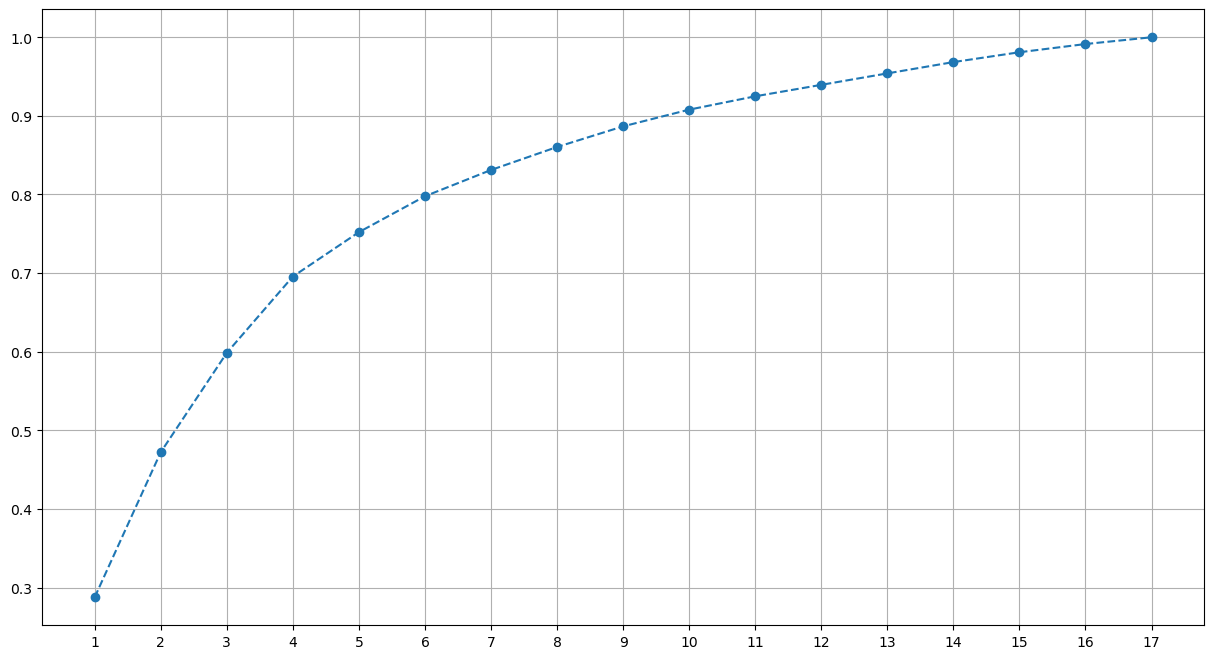

In [271]:
df_pca = final_df.iloc[: , 0:17]

pca = PCA()
pca.fit(df_pca)
explained_variance_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_variance_ratio)

# visualization
plt.figure(figsize=(15,8))
plt.plot(range(1,len(cum_var)+1),cum_var,marker='o',linestyle='--')
plt.xticks(range(1,len(cum_var)+1))
plt.grid()
plt.show()

**Interpretation:** we are going to use first 9 PCs as ~90% of the variance are explained by them

In [ ]:
pca_data = pca.transform(df_pca)[:, :9] ## as we are going to use 9 pc's
pca_df = pd.DataFrame(pca_data,columns=[f'PC{i+1}' for i in range(0,9)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.58,2.99,1.64,0.30,1.04,0.49,0.98,-0.80,-1.98
1,-0.78,-4.32,-1.90,-1.05,-1.93,-2.21,-1.49,-0.22,-0.46
2,-1.48,2.60,2.89,1.00,-0.49,0.63,0.73,-0.03,0.07
3,-0.09,-2.04,-3.76,-0.58,1.31,-2.18,-1.82,-0.52,0.35
4,-1.30,1.04,-0.11,1.02,-1.13,0.13,-0.56,-0.65,0.58
...,...,...,...,...,...,...,...,...,...
103899,-0.71,-3.97,0.51,-0.03,-0.27,-0.93,1.97,1.22,0.22
103900,-1.51,3.71,-1.12,-2.18,-0.18,0.73,-0.68,0.36,1.16
103901,-0.71,-0.30,3.67,-0.03,1.72,0.90,0.42,2.39,0.21
103902,-0.87,-4.89,0.13,-2.59,0.13,0.65,-2.59,2.55,1.31


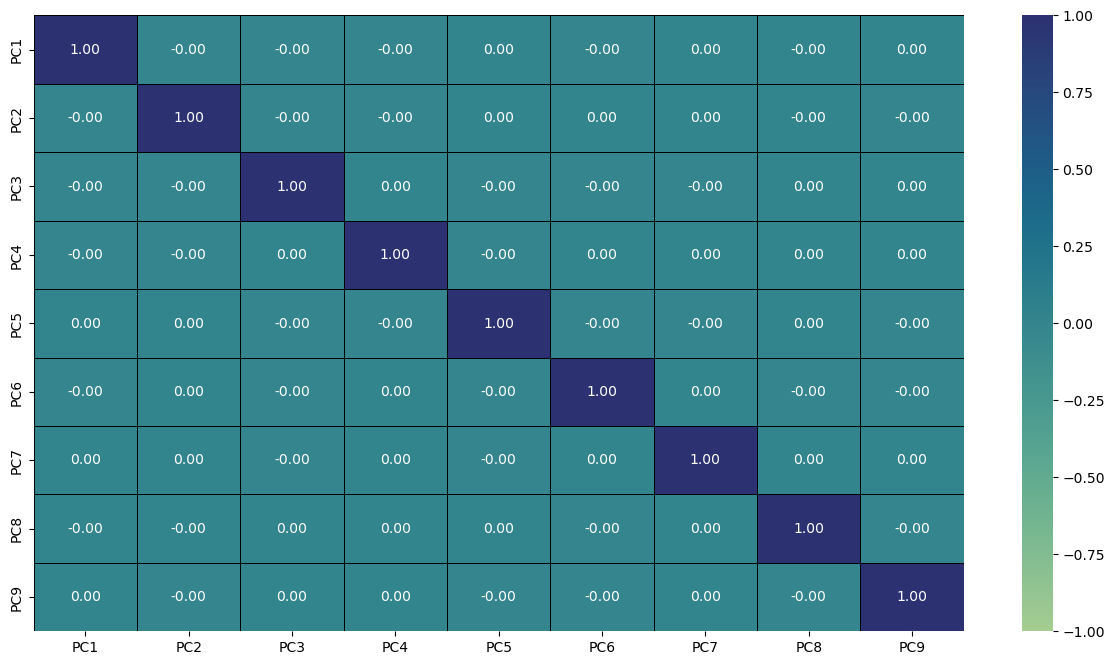

In [ ]:
# checking for correlation among the PC components
plt.figure(figsize = (15,8))
sns.heatmap(pca_df.corr(), linewidths = 0.6, annot = True, linecolor = "black",vmin=-1,cmap = 'crest',fmt = ".2f")
plt.show()

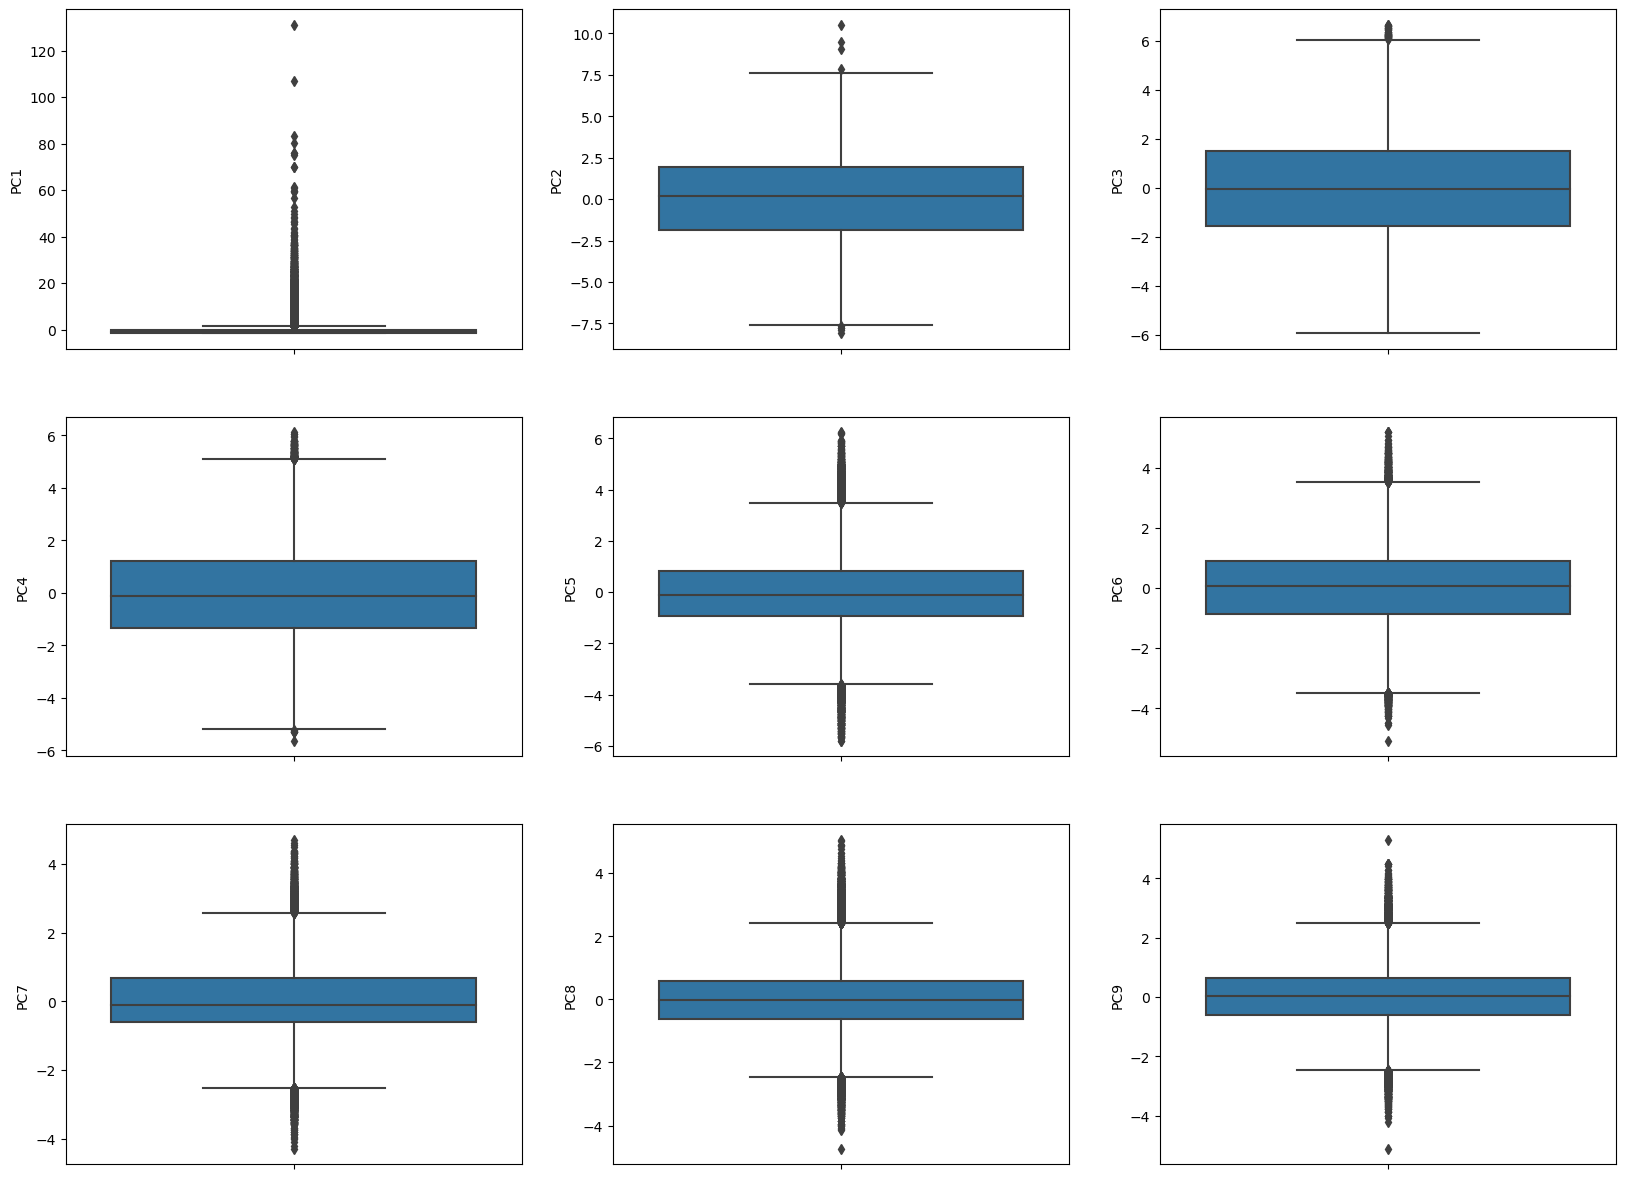

In [212]:
# checking for outliers

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20,15))
for col,subplot in zip(pca_df.columns,ax.flatten()):
    sns.boxplot(y=pca_df[col],ax=subplot)
plt.show()

In [213]:
# missing values in PCs
pca_df.isnull().sum()

PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
PC6    0
PC7    0
PC8    0
PC9    0
dtype: int64

There are no missing values in PCA dimensions.

In [215]:
pca_df.shape

(103904, 9)

Concatenating PCA dimensions with ecoded features for Clustering.

In [216]:
pcaencod_df=pd.concat([pca_df,df_encoded.reset_index(drop=True)],axis=1)
pcaencod_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Gender_Male,Customer_disloyal Customer,Travel_Personal Travel,Delay_status_Arrival delay,Delay_status_Departure delay,Delay_status_No delay,Class_encoded
0,0.58,2.99,1.64,0.30,1.04,0.49,0.98,-0.80,-1.98,1,0,1,0,0,0,1.00
1,-0.78,-4.32,-1.90,-1.05,-1.93,-2.21,-1.49,-0.22,-0.46,1,1,0,0,0,0,2.00
2,-1.48,2.60,2.89,1.00,-0.49,0.63,0.73,-0.03,0.07,0,0,0,0,0,1,2.00
3,-0.09,-2.04,-3.76,-0.58,1.31,-2.18,-1.82,-0.52,0.35,0,0,0,0,0,0,2.00
4,-1.30,1.04,-0.11,1.02,-1.13,0.13,-0.56,-0.65,0.58,1,0,0,0,0,1,2.00


In [217]:
pcaencod_df.shape

(103904, 16)

<a id="kmeans"></a>
### 9.2 K-means Clustering

Text(0, 0.5, 'WCSS')

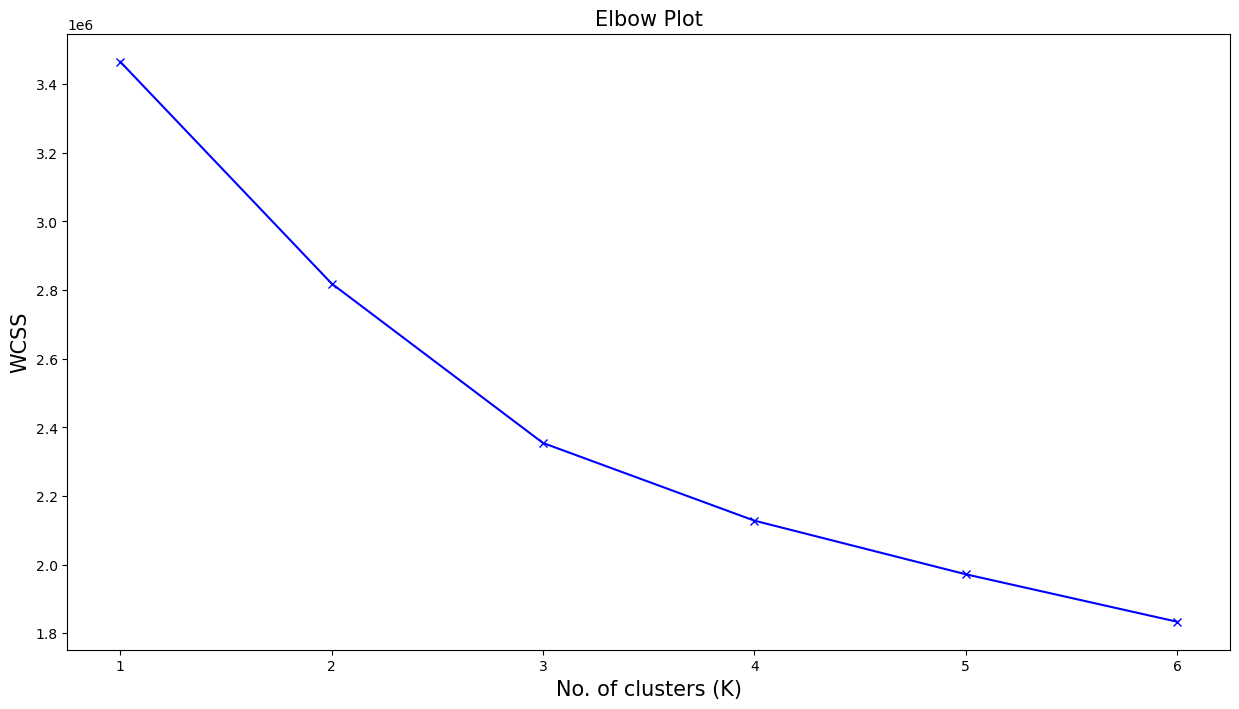

In [220]:
# Lets find out the optimal number of clusters
clusters = range(1,7)
wcss = []

for k in clusters:
    kmeans= KMeans(n_clusters= k,random_state= 42)
    kmeans.fit(pcaencod_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(clusters, wcss, 'bx-')
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

**Interpretation:** using elbow method we can deduce that optimal no. of clusters would be either 2 or 3.

**Optimal Value of K Using Silhouette Score**

In [222]:
# create a list for different values of K
n_clusters = [2,3,4,5,6]
silhouette_coefficients= []

for K in n_clusters:
    cluster = KMeans(n_clusters= K, random_state= 42)
    predict = cluster.fit_predict(pcaencod_df)
    score = silhouette_score(pcaencod_df, predict, random_state = 42) # silhouette coefficients
    print (f"For {K} clusters the silhouette score is {score}")
    silhouette_coefficients.append(score)

For 2 clusters the silhouette score is 0.4658070732689769
For 3 clusters the silhouette score is 0.18152356163304703
For 4 clusters the silhouette score is 0.15556127723470106
For 5 clusters the silhouette score is 0.15883033224636298
For 6 clusters the silhouette score is 0.15521967717278037


**Interpretation:** We can clearly observe that with elbow plot and silhouette scores, the optimal value of K (no. of clusters) is 2.

In [223]:
# Build a Kmeans model with 2 clusters
kmeans_clusters = KMeans(n_clusters = 2, random_state = 42)

# predictions of clusters
kpred = kmeans_clusters.fit_predict(pcaencod_df)

In [224]:
cluster_labels = kmeans_clusters.labels_
results = pd.DataFrame(cluster_labels, columns = ['Cluster'])

# check the size of each cluster
cluster_size = results.groupby('Cluster').size()
cluster_size

Cluster
0    98287
1     5617
dtype: int64

<Figure size 1500x800 with 0 Axes>

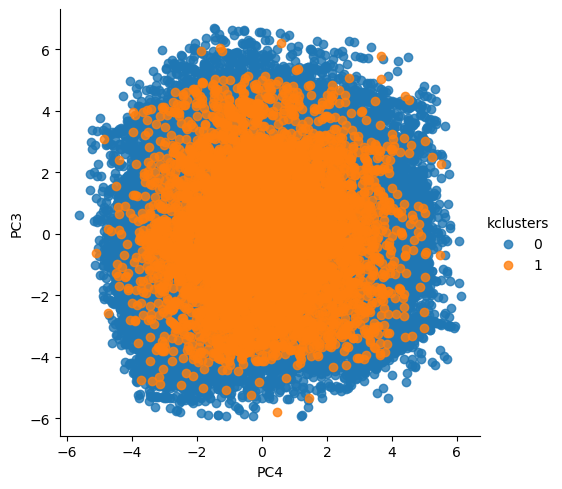

In [ ]:
#copying the clusterd data into newcluster_pca_df
cluster_pca_df = pcaencod_df.copy()
cluster_pca_df['kclusters'] = results
plt.figure(figsize=(15,8))
sns.lmplot(x ='PC4',y ='PC3',hue ='kclusters', data = cluster_pca_df, fit_reg = False)
plt.show()

**Interpretation**: If we make 2 clusters, we observe huge difference between the clusters' data points which makes one cluster more dominant than other.

Let's try to make 3 clusters and check if we get better split of data points among the three clusters.

In [229]:
# Build a K-means model with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)

# predictions of clusters
pred = kmeans.fit_predict(pcaencod_df)

In [230]:
cluster_label = kmeans.labels_
cluster_results = pd.DataFrame(cluster_label, columns = ['Cluster'])

# check the size of each cluster
size = cluster_results.groupby('Cluster').size()
size

Cluster
0    43862
1    55067
2     4975
dtype: int64

<Figure size 1500x800 with 0 Axes>

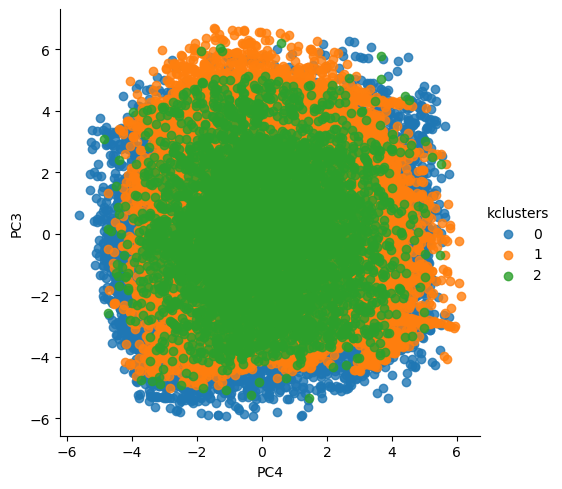

In [277]:
cluster_pca_df_2 = pcaencod_df.copy()
cluster_pca_df_2['kclusters'] = cluster_results
plt.figure(figsize=(15,8))
sns.lmplot(x ='PC4',y ='PC3',hue ='kclusters', data = cluster_pca_df_2, fit_reg = False)
plt.show()

**Interpretation:** Size of Cluster 0 and 1 is almost similar. While Cluster 2 has least number of values i.e. 4975. Cluster 2 might reflect a distinct, perhaps outlier segment.

**Concatenating pcaencod_df, cluster_results and target_df for Cluster wise proportion of the Satisfaction**

In [234]:
final_df2 = pd.concat([pcaencod_df, cluster_results,target_df], axis = 1)
final_df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Gender_Male,Customer_disloyal Customer,Travel_Personal Travel,Delay_status_Arrival delay,Delay_status_Departure delay,Delay_status_No delay,Class_encoded,Cluster,satisfaction
0,0.58,2.99,1.64,0.30,1.04,0.49,0.98,-0.80,-1.98,1,0,1,0,0,0,1.00,1,1
1,-0.78,-4.32,-1.90,-1.05,-1.93,-2.21,-1.49,-0.22,-0.46,1,1,0,0,0,0,2.00,0,1
2,-1.48,2.60,2.89,1.00,-0.49,0.63,0.73,-0.03,0.07,0,0,0,0,0,1,2.00,1,0
3,-0.09,-2.04,-3.76,-0.58,1.31,-2.18,-1.82,-0.52,0.35,0,0,0,0,0,0,2.00,0,1
4,-1.30,1.04,-0.11,1.02,-1.13,0.13,-0.56,-0.65,0.58,1,0,0,0,0,1,2.00,1,0


In [245]:
proportions_df = final_df2.groupby('Cluster')['satisfaction'].value_counts(normalize = True).unstack()
proportions_df

satisfaction,0,1
Cluster,,
0,0.17,0.83
1,0.65,0.35
2,0.35,0.65


**Visualising the Cluster wise proportion of the Satisfaction**

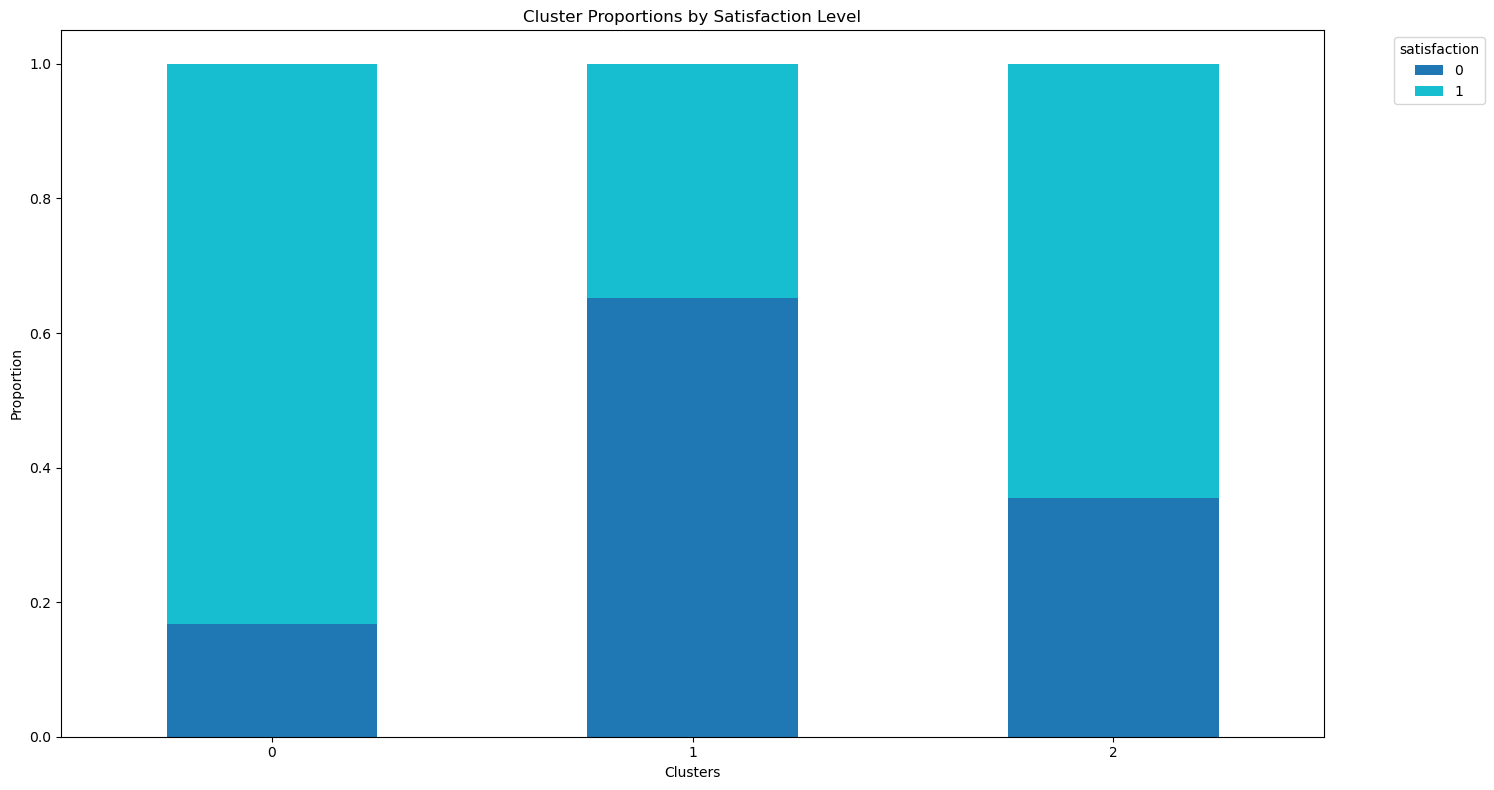

In [272]:
proportions_df.plot(kind='bar', stacked=True, figsize=(15, 8), rot = 0.90,colormap='tab10')

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Proportion')
plt.title('Cluster Proportions by Satisfaction Level')
plt.legend(title='satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretation**:

We are getting dissatisfied to satisfied proportion highly different in the cluster 0 with the other 2 clusters. there are more `neutral or dissatisfied` passengers present in cluster 0. considering the overall size of cluster 2 is significantly small, we can use cluster 0 for further analysis.

**Let us see the difference between the means of each feature in `final_df2` grouped by `Satisfaction` for dominant clusters.**

In [278]:
# Determine dominant clusters for satisfaction and dissatisfaction
dominant_cluster_dissatisfaction = proportions_df.loc[0].idxmax()  # For satisfaction= 0
dominant_cluster_satisfaction = proportions_df.loc[1].idxmax()  # For dissatisfaction=1

# Extract rows from original data
dissatisfaction_data = final_df2[final_df2['Cluster'] == dominant_cluster_dissatisfaction]
satisfaction_data = final_df2[final_df2['Cluster'] == dominant_cluster_satisfaction]

# Compute feature means for each dominant cluster
dissatisfaction_means = dissatisfaction_data.mean()
satisfaction_means = satisfaction_data.mean()

# Identify key features contributing to satisfaction and dissatisfaction
contributing_features = pd.DataFrame({
    'neutral or dissatisfied': dissatisfaction_means,
    'satisfied': satisfaction_means
})

contributing_features_sorted = contributing_features.sort_values(by= ['neutral or dissatisfied','satisfied'], ascending= False)

# Display results
print("Contributing features sorted by their impact on satisfied vs neutral or dissatisfied:")
contributing_features_sorted

Contributing features sorted by their impact on satisfied vs neutral or dissatisfied:


,neutral or dissatisfied,satisfied
PC2,1.85,-2.39
Class_encoded,1.27,0.74
Cluster,1.00,0.00
Gender_Male,0.50,0.49
Delay_status_No delay,0.49,0.46
PC3,0.36,-0.45
satisfaction,0.35,0.83
Travel_Personal Travel,0.24,0.40
Customer_disloyal Customer,0.14,0.24
Delay_status_Departure delay,0.12,0.10


Visualising The `contributing_features_sorted` table.

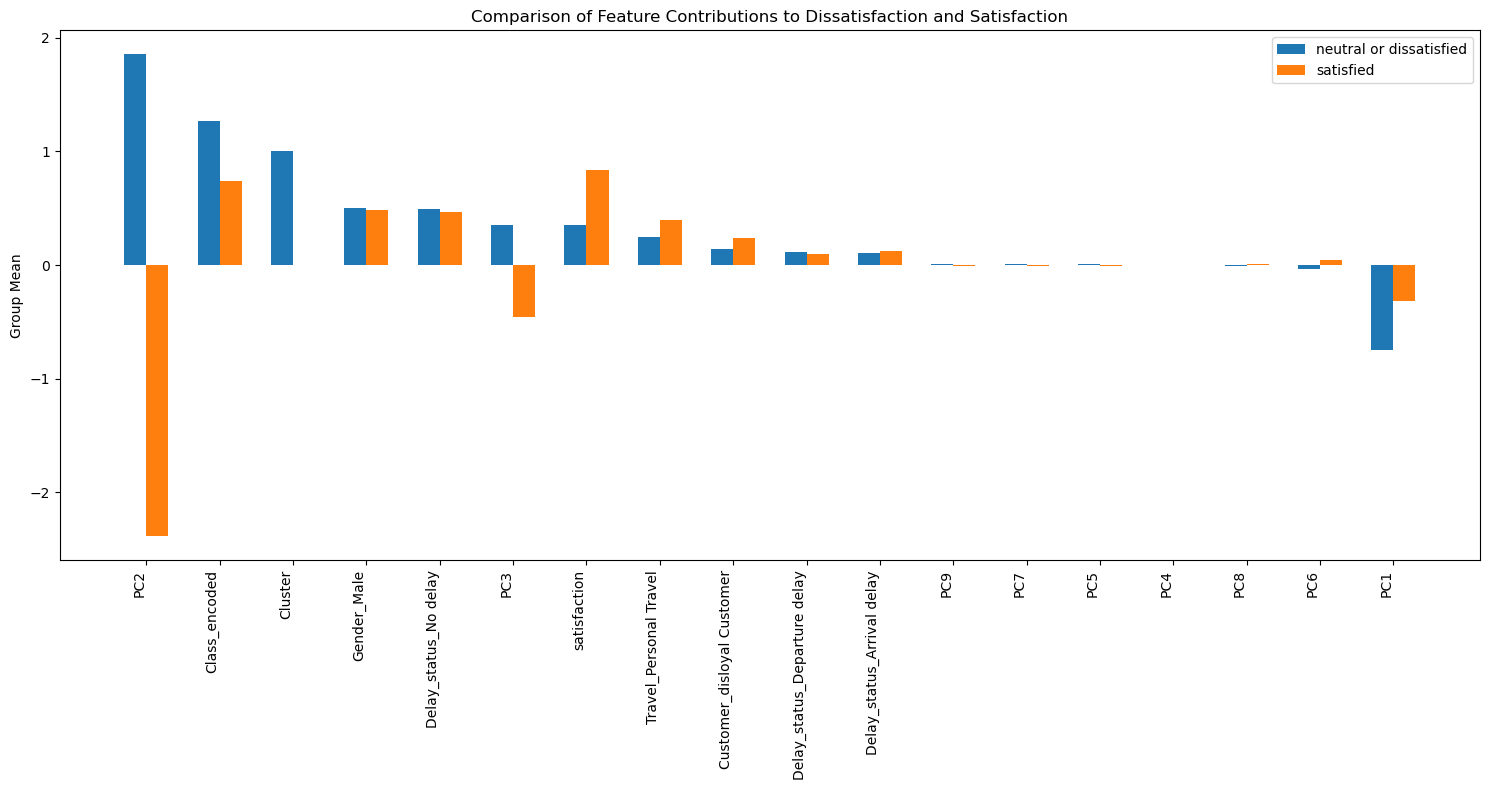

In [279]:
features = contributing_features_sorted.index # contains feature names
dissatisfaction_values = contributing_features_sorted['neutral or dissatisfied'].values # contains Dissatisfaction means 
satisfaction_values = contributing_features_sorted['satisfied'].values # contains Satisfaction means

# Create the plot
x = np.arange(len(features))
width = 0.30
plt.figure(figsize=(15, 8))
plt.bar(x - width / 2, dissatisfaction_values, width, label='neutral or dissatisfied')
plt.bar(x + width / 2, satisfaction_values, width, label="satisfied")
plt.xticks(x, features, rotation=90, ha='right')
plt.ylabel("Group Mean")
plt.title("Comparison of Feature Contributions to Dissatisfaction and Satisfaction")
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation:**
* Features with the largest differences in means between `neutral or dissatisfied` and `satisfied` are likely to be the most significant in distinguishing these two groups.
* `PC2` and `Class_encoded` have the largest mean differences, suggesting they play a critical role in differentiating dissatisfaction from satisfaction.
* Features with means close to 0 or minimal difference (e.g., `Gender_Male`,` Delay_status_No delay`, and some PCs like `PC9`, `PC7`, `PC8` and others) do not contribute strongly to distinguishing the two groups.

<a id="sl"></a>
## 10. Supervised Learning

#### Splitting train-test data

In [289]:
# ------------------ With PCs ------------- #

# Splitting train-test dataset
pca_X = final_df2.loc[ : , final_df2.columns != 'satisfaction']
pca_y = final_df2['satisfaction']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_X, pca_y , test_size = 0.25, random_state = 42)

# check the dimensions of train and test subsets
print(f"PCA X-train shape: {X_train_pca.shape}")
print(f"PCA X-test shape: {X_test_pca.shape}")
print(f"PCA y-train shape: {y_train_pca.shape}")
print(f"PCA y-test shape: {y_test_pca.shape}")

PCA X-train shape: (77928, 17)
PCA X-test shape: (25976, 17)
PCA y-train shape: (77928,)
PCA y-test shape: (25976,)


**Modelling**

In [296]:
# creating a user defined function to run the models

def run_models(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test) # predictions
          
    # confusion matrix
    model_cm = confusion_matrix(y_test, y_pred)
    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(model_cm, annot=True, cmap = ListedColormap(['Lightblue']), fmt='g', cbar=False,
                linewidths = 0.1, annot_kws = {'size': 12})
    plt.xlabel('Predicted', fontsize = 12)
    plt.ylabel('Actual', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Confusion Matrix', fontsize = 12)
    plt.show()

    model_accuracy = round(100 * accuracy_score(y_test, y_pred),2) # model accuracy
    print(f"Model Accuracy: {model_accuracy:.2f}")
    model_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'),2)
    print(f"Model Precision: {model_precision:.2f}") # model precision
    model_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'),2)
    print(f"Model Recall: {model_recall:.2f}") # model recall
    
    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    # Plotting ROC-AUC Curve
    fpr,tpr,_= roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,color='blue',lw=2,label="ROC AUC score=%0.2f"%roc_auc)
    plt.plot([0,1],[0,1],color='gray',linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.legend()
    plt.show()
    
    return model, model_accuracy, model_precision, model_recall, model_cm, roc_auc

<a id="lr"></a>
### 10.1 Logistic Regression (PCs + encoded features)

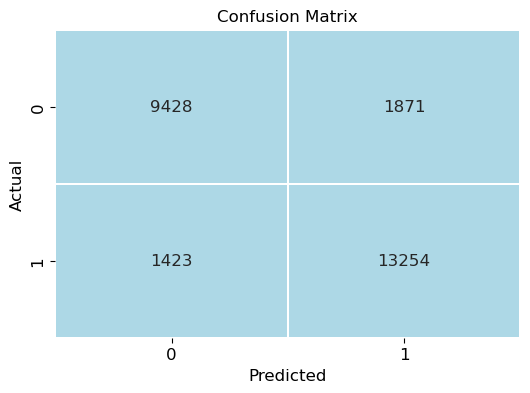

Model Accuracy: 87.32
Model Precision: 87.31
Model Recall: 87.32


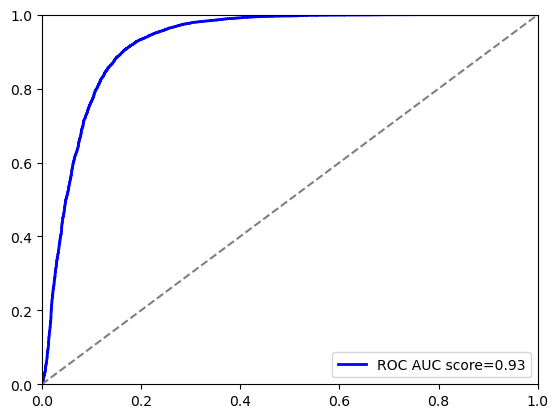

In [ ]:
# call the function run_models
params_lr = {'random_state': 42}
lr_model_pca = LogisticRegression(**params_lr)
lr_model_pca, lr_pca_accur, lr_pca_preci, lr_pca_recall, lr_pca_cm, lr_pca_roc_auc = run_models(lr_model_pca, 
                                                                                               X_train_pca, y_train_pca, 
                                                                                               X_test_pca, y_test_pca)

<a id="rge"></a>
### 10.2 Ridge Classifier (PCs + encoded features)

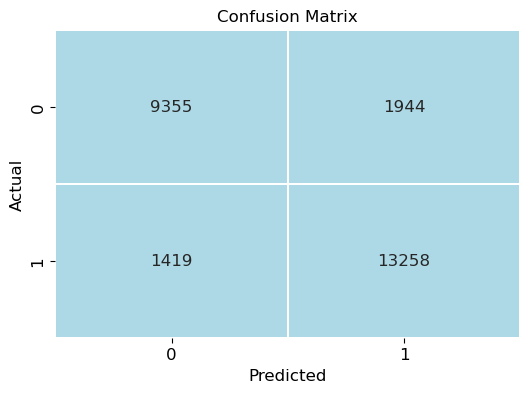

Model Accuracy: 87.05
Model Precision: 87.05
Model Recall: 87.05


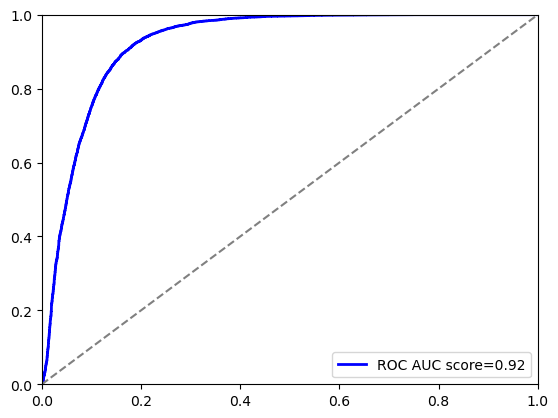

In [315]:
params_rge = {'alpha':1.0, 
              'solver':'auto',
              'random_state':42}
# using CalibratedClassifierCV to convert RidgeClassifier outputs into probabilities
rge_model_pca = CalibratedClassifierCV(base_estimator=RidgeClassifier(**params_rge),cv=5)
rge_model_pca, rge_pca_accur, rge_pca_preci, rge_pca_recall, rge_pca_cm, rge_pca_roc_auc = run_models(rge_model_pca, X_train_pca, 
                                                                                                y_train_pca, X_test_pca, 
                                                                                                y_test_pca)

<a id="dt"></a>
### 10.3 Decision Tree (PCs + encoded features)

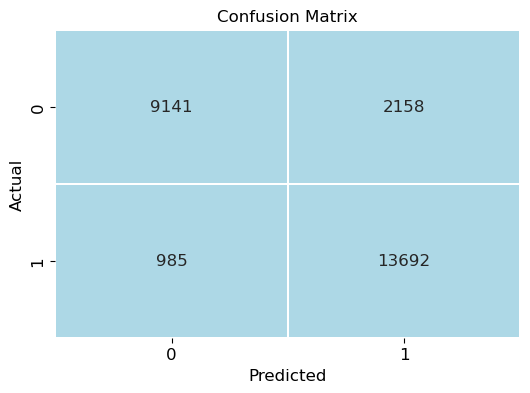

Model Accuracy: 87.90
Model Precision: 88.08
Model Recall: 87.90


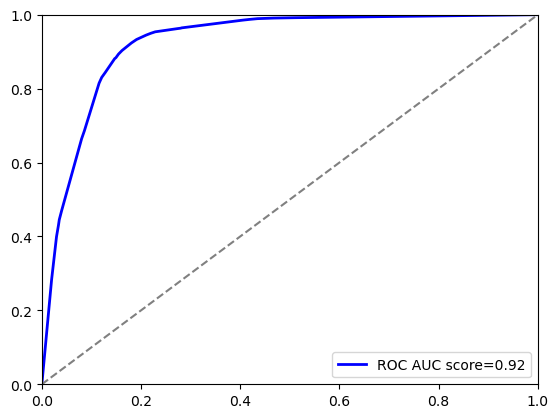

In [ ]:
params_dt = {'max_depth':5,
             'criterion':'gini',
             'random_state': 42}
dt_model_pca = DecisionTreeClassifier(**params_dt)
dt_model_pca, dt_pca_accur, dt_pca_preci, dt_pca_recall, dt_pca_cm, dt_pca_roc_auc = run_models(dt_model_pca, X_train_pca, 
                                                                                                y_train_pca, X_test_pca, 
                                                                                                y_test_pca)

<a id="knn"></a>
### 10.4 K-Nearest Neighbors (PCs + encoded features)

Let's find optimal number of neighbors using Elbow Method

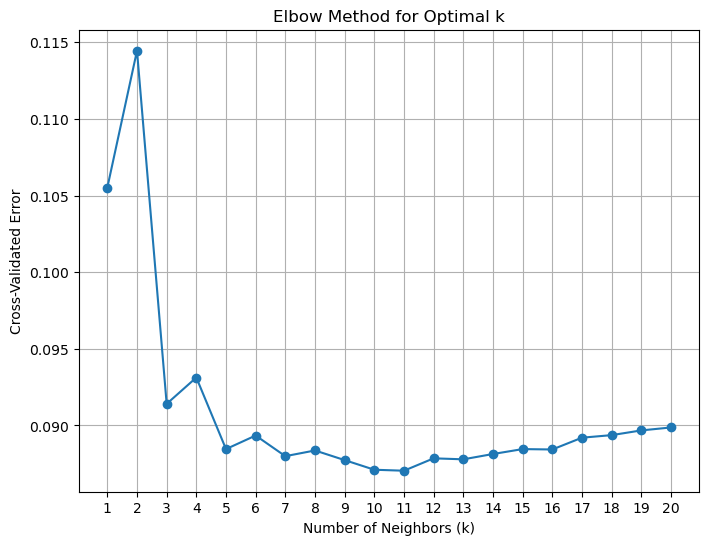

The optimal number of neighbors is: 11


In [ ]:
# Range of k values to test
k_values = range(1, 21)
mean_errors = []

# Loop through k values to calculate cross-validated error
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_pca, y_train_pca, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_error = 1 - cv_scores.mean()  # Error = 1 - Accuracy
    mean_errors.append(mean_error) # min error will give the best K

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_errors, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Error')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the best k (smallest error)
best_k = k_values[np.argmin(mean_errors)]
print(f"The optimal number of neighbors is: {best_k}")

**Lets use K = 11 and build the model.**

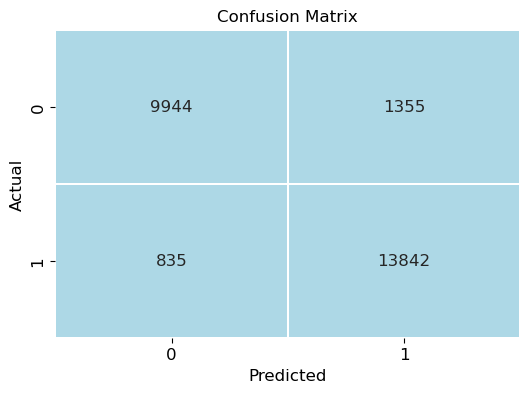

Model Accuracy: 91.57
Model Precision: 91.59
Model Recall: 91.57


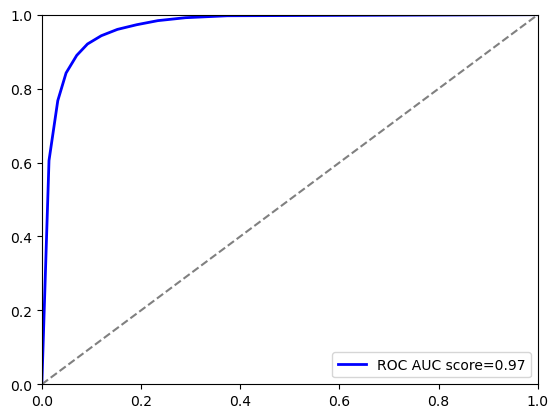

In [ ]:
# using k =11
params_knn = {'n_neighbors': 11,'metric': 'minkowski'}
knn_model_pca = KNeighborsClassifier(**params_knn)   
knn_model_pca, knn_pca_accur, knn_pca_preci, knn_pca_recall, knn_pca_cm, knn_pca_roc_auc = run_models(knn_model_pca, 
                                                                                                     X_train_pca, 
                                                                                                     y_train_pca, 
                                                                                                     X_test_pca, y_test_pca)

<a id="gb"></a>
### 10.5 Gaussian Naive Bayes (PCs + encoded features)

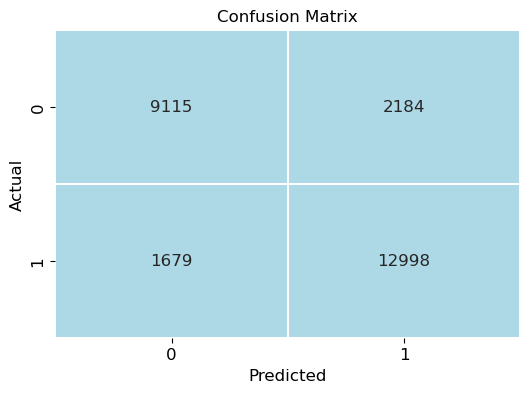

Model Accuracy: 85.13
Model Precision: 85.11
Model Recall: 85.13


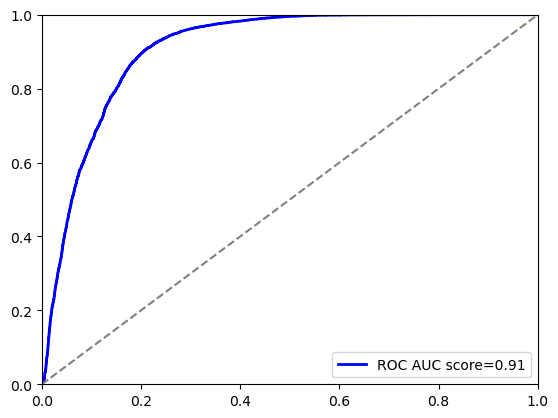

In [302]:
params_gb = {}
gb_model_pca = GaussianNB(**params_gb)
gb_model_pca, gb_pca_accur, gb_pca_preci, gb_pca_recall, gb_pca_cm, gb_pca_roc_auc = run_models(gb_model_pca, 
                                                                                               X_train_pca, y_train_pca, 
                                                                                               X_test_pca, y_test_pca)

<a id="rf"></a>
### 10.6 Random Forest (PCs + ecoded features)

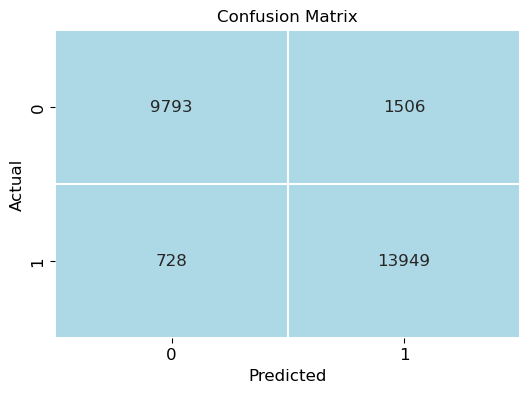

Model Accuracy: 91.40
Model Precision: 91.48
Model Recall: 91.40


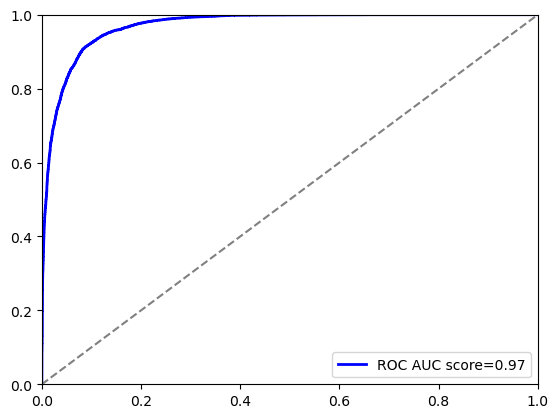

In [303]:
params_rf = {'max_depth': 10,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 200,
             'random_state': 42}

rf_model_pca = RandomForestClassifier(**params_rf)
rf_model_pca, rf_pca_accur, rf_pca_preci, rf_pca_recall, rf_pca_cm, rf_pca_roc_auc = run_models(rf_model_pca, 
                                                                                               X_train_pca, y_train_pca, 
                                                                                               X_test_pca, y_test_pca)

<a id="ada"></a>
### 10.7 AdaBoost Classifier (PCs + encoded features)

Using Decision Tree as base estimator with the same parameters as used previously.

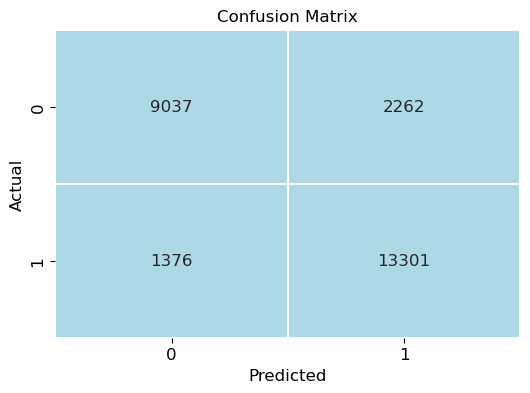

Model Accuracy: 85.99
Model Precision: 86.04
Model Recall: 85.99


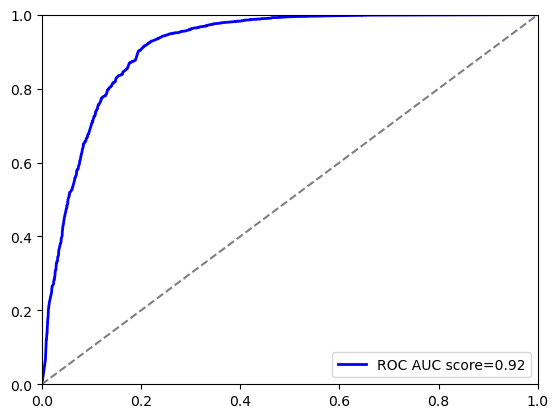

In [ ]:
base_model = DecisionTreeClassifier(max_depth=1) ## initiating with a weak estimator
params_ada = {'base_estimator' : base_model,   
              'n_estimators' : 50,            
              'learning_rate' : 0.1,          
              'random_state' : 42  }

ada_model_pca = AdaBoostClassifier(**params_ada)

ada_model_pca, ada_pca_accur, ada_pca_preci, ada_pca_recall, ada_pca_cm, ada_pca_roc_auc = run_models(ada_model_pca, 
                                                                                               X_train_pca, y_train_pca, 
                                                                                               X_test_pca, y_test_pca)

<a id="xgb"></a>
### 10.8 Extreme Gradient Boost (PCs + encoded features)

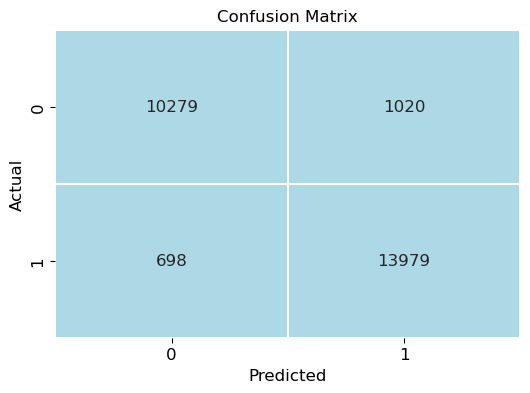

Model Accuracy: 93.39
Model Precision: 93.39
Model Recall: 93.39


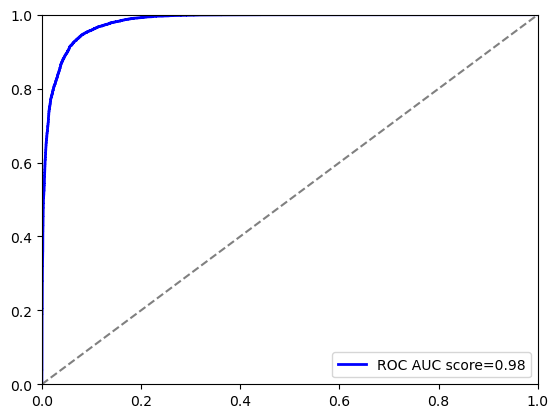

In [304]:
params_xgb ={'random_state': 42}
xgb_model_pca = XGBClassifier(**params_xgb)
xgb_model_pca, xgb_pca_accur, xgb_pca_preci, xgb_pca_recall, xgb_pca_cm, xgb_pca_roc_auc = run_models(xgb_model_pca, 
                                                                                                     X_train_pca, 
                                                                                                     y_train_pca, 
                                                                                                     X_test_pca, y_test_pca)

<a id="eval"></a>
## 11. Model Evaluation

<a id="res"></a>
### 11.1 Tabulating the evaluation metrices 

In [316]:
model_names = ['Logistic Regression','Ridge Classifier', 'Decision Trees', 'KNN', 'Gaussian Naive Bayes', 'Random Forest','XGBoost','AdaBoost']
accuracy_scores = [lr_pca_accur, rge_pca_accur,dt_pca_accur, knn_pca_accur, gb_pca_accur, rf_pca_accur, xgb_pca_accur,ada_pca_accur]
precision_scores = [lr_pca_preci,rge_pca_preci, dt_pca_preci, knn_pca_preci, gb_pca_preci, rf_pca_preci, xgb_pca_preci,ada_pca_preci]
recall_scores = [lr_pca_recall,rge_pca_recall,dt_pca_recall, knn_pca_recall, gb_pca_recall, rf_pca_recall, xgb_pca_recall,ada_pca_recall]
auc_scores = [lr_pca_roc_auc,rge_pca_roc_auc, dt_pca_roc_auc, knn_pca_roc_auc, gb_pca_roc_auc, rf_pca_roc_auc, xgb_pca_roc_auc,ada_pca_roc_auc]

# Create a DataFrame
model_scores_df = pd.DataFrame({
    'Model_Name': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'ROC-AUC_Score': auc_scores
})

model_scores_df

,Model_Name,Accuracy,Precision,Recall,ROC-AUC_Score
0,Logistic Regression,87.32,87.31,87.32,0.93
1,Ridge Classifier,87.05,87.05,87.05,0.92
2,Decision Trees,87.90,88.08,87.90,0.92
3,KNN,91.57,91.59,91.57,0.97
4,Gaussian Naive Bayes,85.13,85.11,85.13,0.91
5,Random Forest,91.40,91.48,91.40,0.97
6,XGBoost,93.39,93.39,93.39,0.98
7,AdaBoost,85.99,86.04,85.99,0.92


<a id="kcv"></a>
### 11.2 K-Fold CrossValidation

In [319]:
models = {
    "Logistic Regression": lr_model_pca,
    "Ridge Classifier": rge_model_pca,
    "Decision Tree": dt_model_pca,
    "KNN": knn_model_pca,
    "Gaussian Naive Bayes": gb_model_pca,
    "Random Forest": rf_model_pca,
    "XGBoost": xgb_model_pca,
    "AdaBoost": ada_model_pca
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform KFold cross-validation for each model
results = {}
for model_name, model in models.items():
    # Evaluate using cross_val_score with accuracy metric
    accuracy_scores = cross_val_score(model, X_train_pca, y_train_pca, cv=kf, scoring='accuracy')
    
    # Evaluate using cross_val_score with ROC-AUC metric
    roc_auc_scores = cross_val_score(model,X_train_pca, y_train_pca, cv=kf, scoring='roc_auc')
    
    # Store results
    results[model_name] = {
        "accuracy_mean": (accuracy_scores.mean())*100,
        "accuracy_std": (accuracy_scores.std())*100,
        "roc_auc_mean": (roc_auc_scores.mean())*100,
        "roc_auc_std": (roc_auc_scores.std())*100
    }
    
    print(f"{model_name}:")
    print(f"  Mean Accuracy = {results[model_name]['accuracy_mean']:.2f}, Std Dev = {results[model_name]['accuracy_std']:.2f}")
    print(f"  Mean ROC-AUC = {results[model_name]['roc_auc_mean']:.2f}, Std Dev = {results[model_name]['roc_auc_std']:.2f}")
    print("-" * 50)

# Find the best model based on both metrics (choose a criterion, e.g., ROC-AUC)
best_model_name = max(results, key=lambda k: results[k]["roc_auc_mean"])
print(f"\nBest Model (based on ROC-AUC): {best_model_name} with Mean ROC-AUC = {results[best_model_name]['roc_auc_mean']:.2f}")

Logistic Regression:
  Mean Accuracy = 87.25, Std Dev = 0.31
  Mean ROC-AUC = 92.53, Std Dev = 0.22
--------------------------------------------------
Ridge Classifier:
  Mean Accuracy = 87.05, Std Dev = 0.29
  Mean ROC-AUC = 92.36, Std Dev = 0.23
--------------------------------------------------
Decision Tree:
  Mean Accuracy = 87.91, Std Dev = 0.35
  Mean ROC-AUC = 92.59, Std Dev = 0.36
--------------------------------------------------
KNN:
  Mean Accuracy = 91.32, Std Dev = 0.25
  Mean ROC-AUC = 96.70, Std Dev = 0.13
--------------------------------------------------
Gaussian Naive Bayes:
  Mean Accuracy = 84.97, Std Dev = 0.26
  Mean ROC-AUC = 90.71, Std Dev = 0.31
--------------------------------------------------
Random Forest:
  Mean Accuracy = 91.14, Std Dev = 0.23
  Mean ROC-AUC = 96.93, Std Dev = 0.16
--------------------------------------------------
XGBoost:
  Mean Accuracy = 93.14, Std Dev = 0.20
  Mean ROC-AUC = 98.06, Std Dev = 0.06
------------------------------------

**Interpretation:**
* XGBoost has the highest mean accuracy (93.14%) and ROC-AUC (98.06%) also it’s well-suited for capturing complex patterns in the data.
* Random Forest and KNN are also strong contenders, both achieving high accuracy and ROC-AUC scores with low variability.
* Logistic Regression, Ridge Classifier, and Decision Tree are reliable baseline models with moderate performance.
* Gaussian Naive Bayes struggles the most, likely due to its simplistic assumptions.
* AdaBoost provides moderate results but is outperformed by other ensemble models like Random Forest and XGBoost.

**Visualing the Scores**

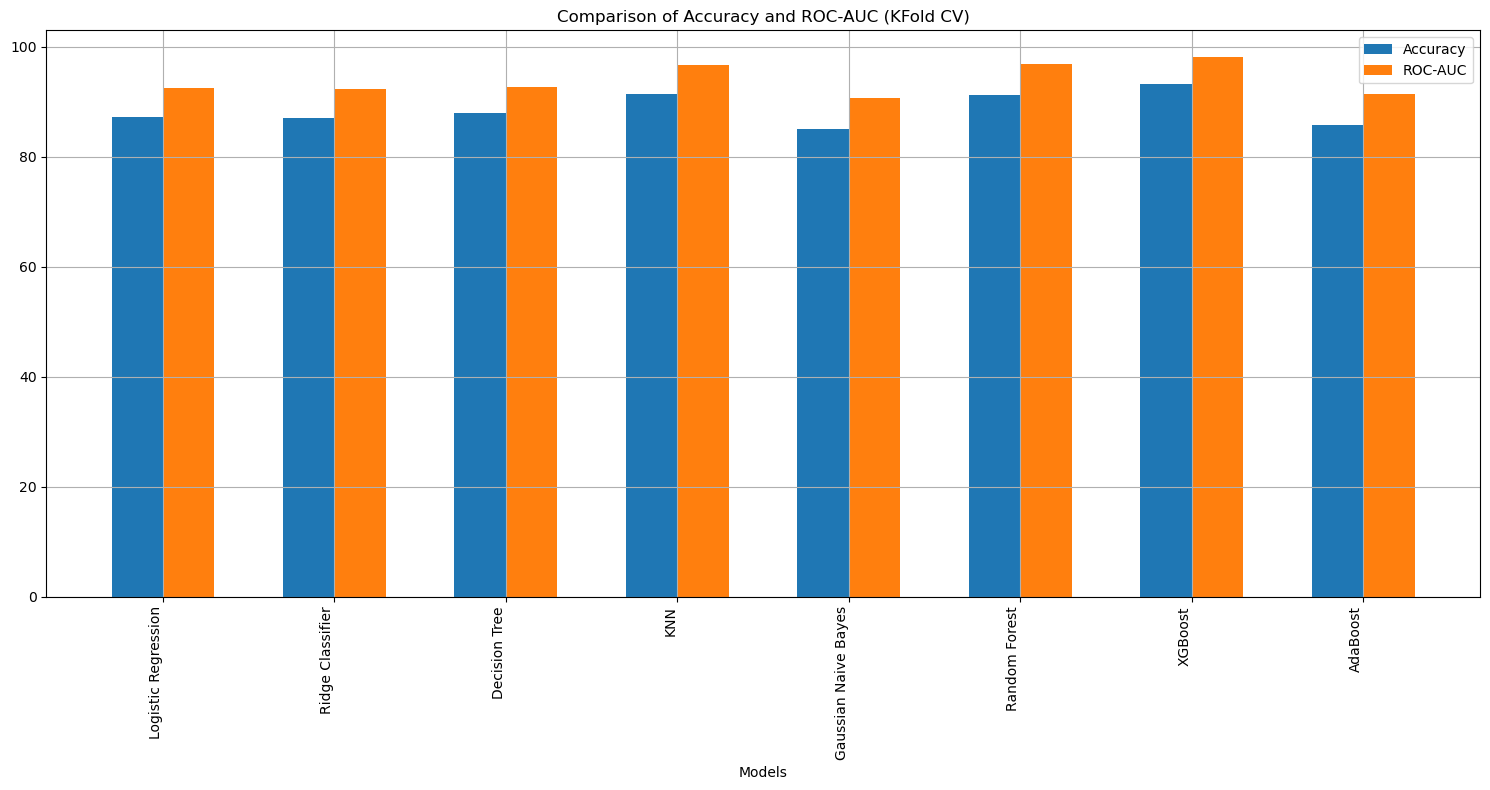

In [ ]:
models_list = list(results.keys())
accuracy_means = [results[model]["accuracy_mean"] for model in models_list]
roc_auc_means = [results[model]["roc_auc_mean"] for model in models_list]

# Create bar plot
x = np.arange(len(models_list))  # Model indices
width = 0.30

fig, ax = plt.subplots(figsize=(15, 8))

# Plot accuracy and ROC-AUC
rects1 = ax.bar(x - width/2, accuracy_means, width, label='Accuracy')
rects2 = ax.bar(x + width/2, roc_auc_means, width, label='ROC-AUC')

ax.set_xlabel('Models')
ax.set_title('Comparison of Accuracy and ROC-AUC (KFold CV)')
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=90, ha="right")
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Interpretation:**
* Based on the results, XGBoost has the best performance.
Hyperparameter tuning can further enhance its predictive power by optimizing hyperparameters like
`Learning rate (eta)`, `Number of estimators (n_estimators)`,`Tree depth (max_depth)`.
* Alternatively, Random Forest is a good option as it is easier to tune than XGBoost and performs competitively.
Parameters to tune: `n_estimators`, `max_depth`, `min_samples_leaf`.

<a id="tune"></a>
## 12. Model Optimization.

<a id="xgtune"></a>
### 12.1 XGBoost Hyperparameter Tuning

In [329]:
param_grid_xgb = {
    'n_estimators': [200,300,350,400],
    'learning_rate': [0.05, 0.1,0.15],
    'max_depth': [5,7,10,12],
}
start_time = time.time()
# Set up GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb_model_pca, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_xgb.fit(X_train_pca, y_train_pca)

elapsed_time_xgb = time.time() - start_time

# the required time of fits
print('Total Time Elapsed',elapsed_time_xgb)

# Best parameters and score
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best ROC-AUC for XGBoost:", round((grid_xgb.best_score_)*100,2))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Total Time Elapsed 806.577828168869
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 300}
Best ROC-AUC for XGBoost: 98.21


<a id="rftune"></a>
### 12.2 Random Forest Hyperparameter Tuning

In [330]:
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30,35],
    'min_samples_split': [2, 5, 10,15],
}

# Start the timer
start_time = time.time()

# Set up GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_rf.fit(X_train_pca, y_train_pca)

# Calculate the elapsed time
elapsed_time_rf = time.time() - start_time

# the required time of fits
print('Total Time Elapsed',elapsed_time_rf)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best ROC-AUC for Random Forest:", round((grid_rf.best_score_)*100,2))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Total Time Elapsed 11657.530909776688
Best parameters for Random Forest: {'max_depth': 35, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC for Random Forest: 97.9


**Interpretation:**
* Since the models were already near optimal performance, the minimal improvement after hyperparameter tuning suggests that the airline can focus on model deployment and monitoring rather than excessive optimization. This reduces operational costs in terms of time and computing resources.

<a id="tune"></a>
## 13. Recommendations.

* The high performance of XGBoost (ROC-AUC: 98.06%) indicates its ability to effectively predict passenger satisfaction. This could lead to better targeting of customer satisfaction initiatives and operational improvements, directly impacting customer retention and loyalty.
* Leverage XGBoost for Enhanced Personalization: The airline can use XGBoost to create more personalized services for passengers based on their predicted satisfaction. This can improve customer loyalty and increase revenue through targeted promotions and services.
* Focus on Monitoring and Refining Existing Models: Given the minimal improvements after hyperparameter tuning, the business should prioritize deploying the best models with periodic monitoring and refining rather than constantly fine-tuning parameters, thereby optimizing both time and resources.


<a id="tune"></a>
## 14. Next Steps.

Moving forward, the focus will be on the following areas:
* Online Deployment and Testing: Implementing real-time model deployment to assess robustness and reliability on unseen or live environments.
* PCs Analysis: Examining principal component loadings to gain deeper insights into their contributions and better interpret clusters.


Thank you!